In [7]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt

In [8]:
runs = ["0.0", "0.1", "0.2", "0.3", "0.4"]
runs = runs[:3]
run = runs[1]
COLUMNS = []

def load_run(run : str) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    edge_path = f"./investigation/Quest-Pro/BeatSaber/PopStars-Medium/stationary_boundary_edge{run}"
    edge_filepath = path.join(edge_path, "ovr_gpu_metrics.csv")
    edge = pd.read_csv(edge_filepath)

    normal_path = f"./investigation/Quest-Pro/BeatSaber/PopStars-Medium/no_boundary{run}"
    normal_filepath = path.join(normal_path, "ovr_gpu_metrics.csv")
    normal = pd.read_csv(normal_filepath)

    roomscale_path = f"./investigation/Quest-Pro/BeatSaber/PopStars-Medium/roomscale_boundary{run}"
    roomscale_filepath = path.join(roomscale_path, "ovr_gpu_metrics.csv")
    roomscale = pd.read_csv(roomscale_filepath)

    stationary_path = f"./investigation/Quest-Pro/BeatSaber/PopStars-Medium/stationary_boundary{run}"
    stationary_filepath = path.join(stationary_path, "ovr_gpu_metrics.csv")
    stationary = pd.read_csv(stationary_filepath)
    
    return edge, stationary, roomscale, normal

data = []
for run in runs:
    rundata = list(load_run(run))
    COLUMNS = rundata[0].columns
    data.append(rundata)


Cannot plot timestamp


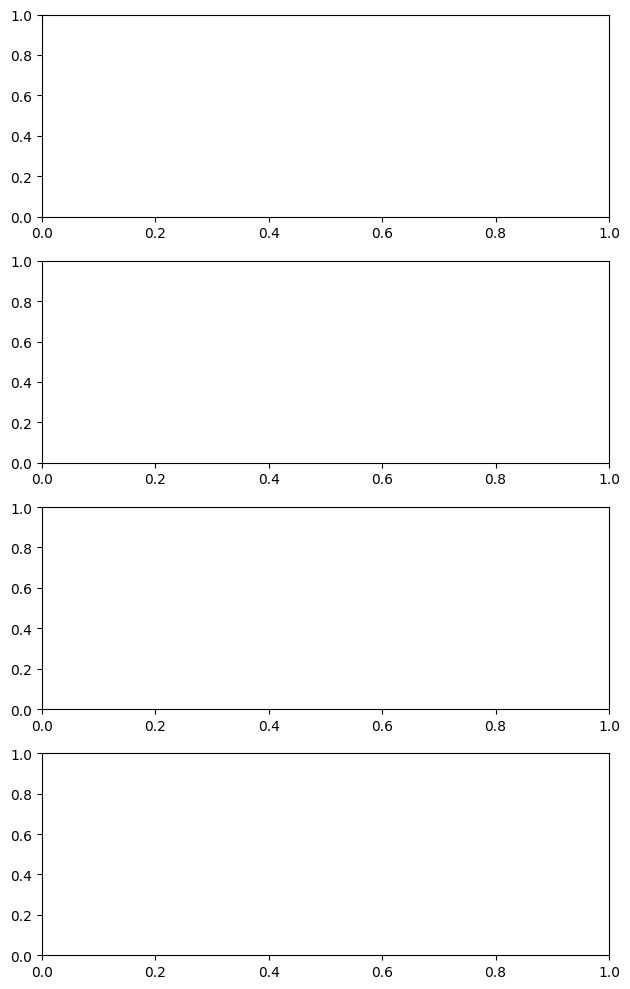

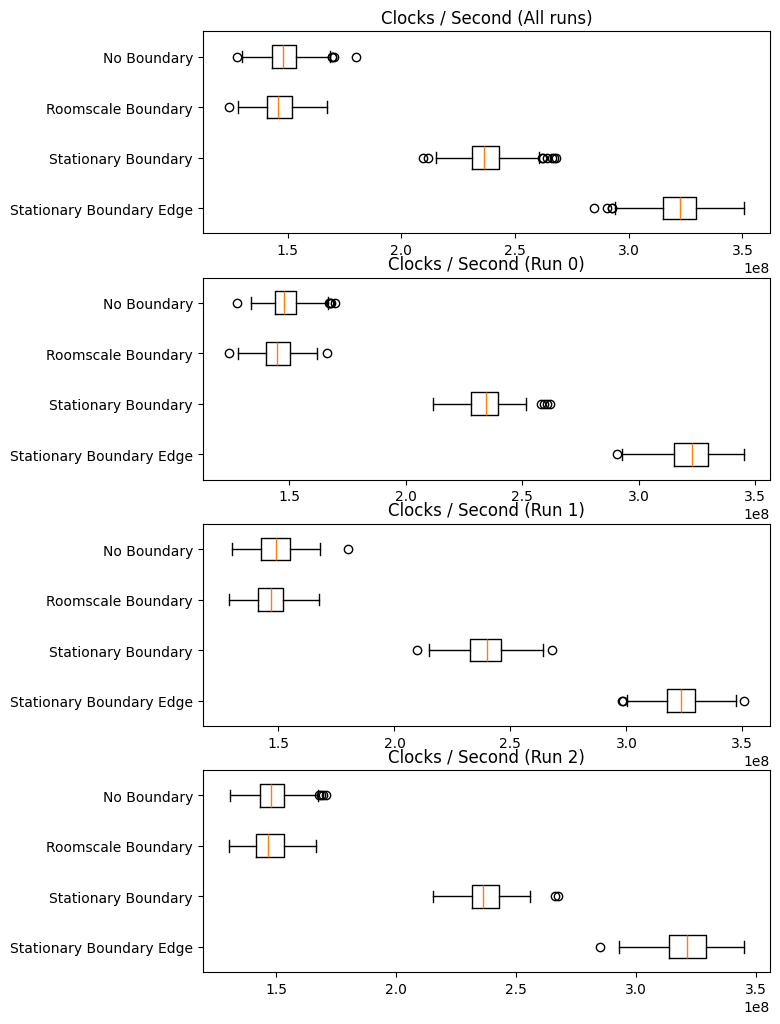

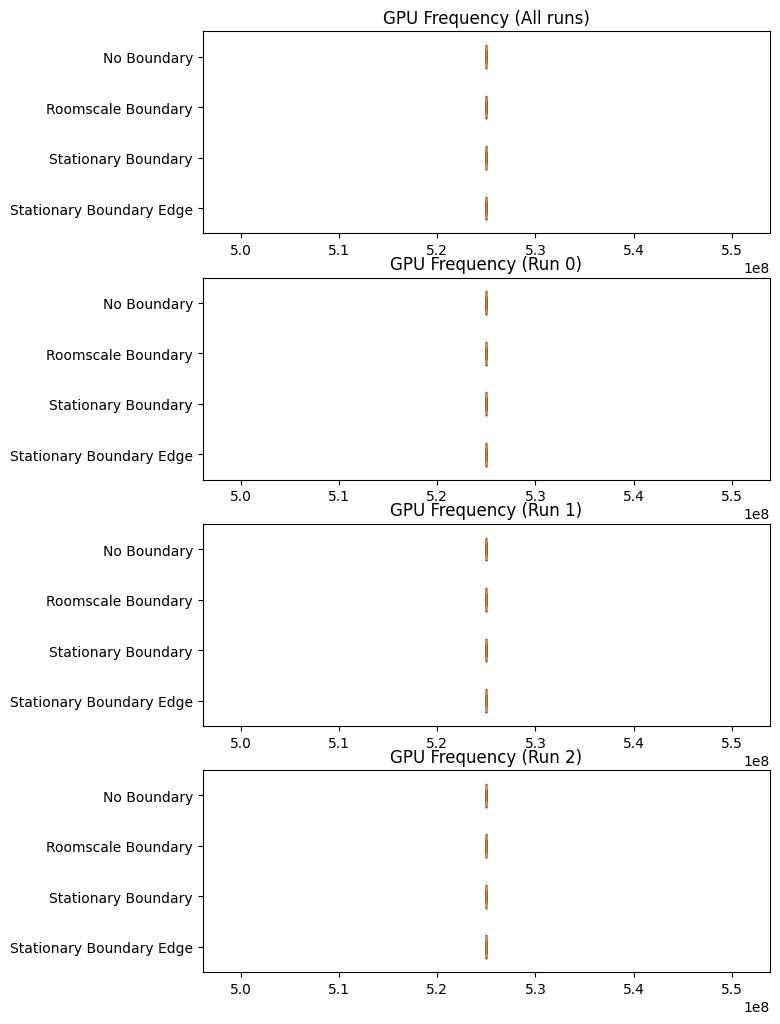

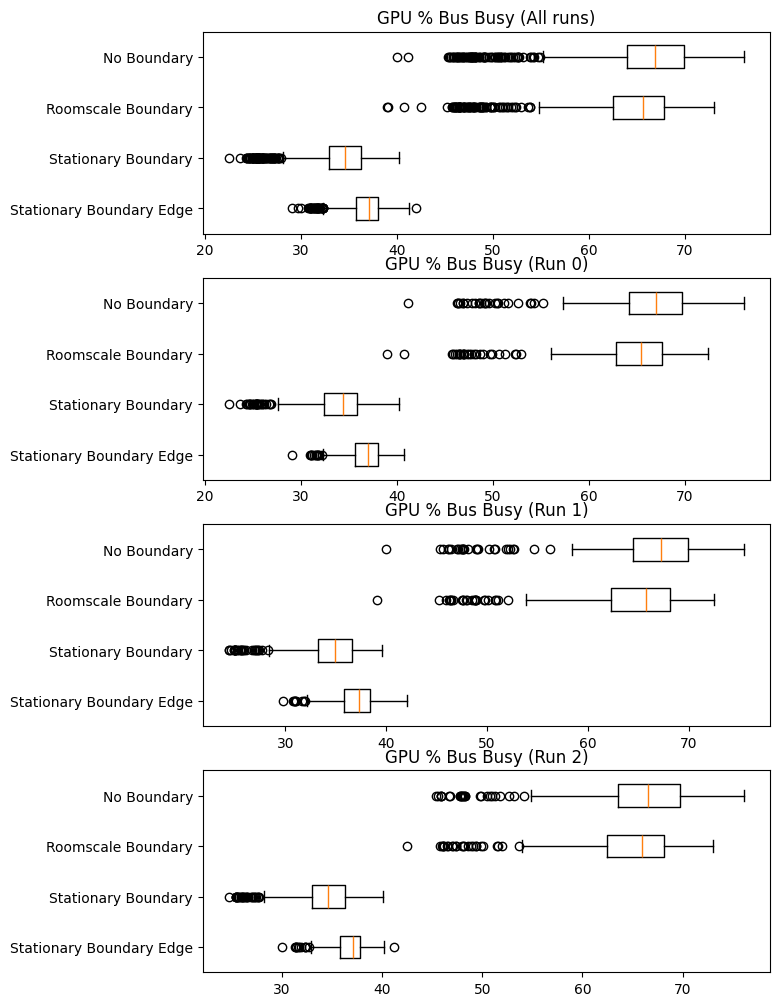

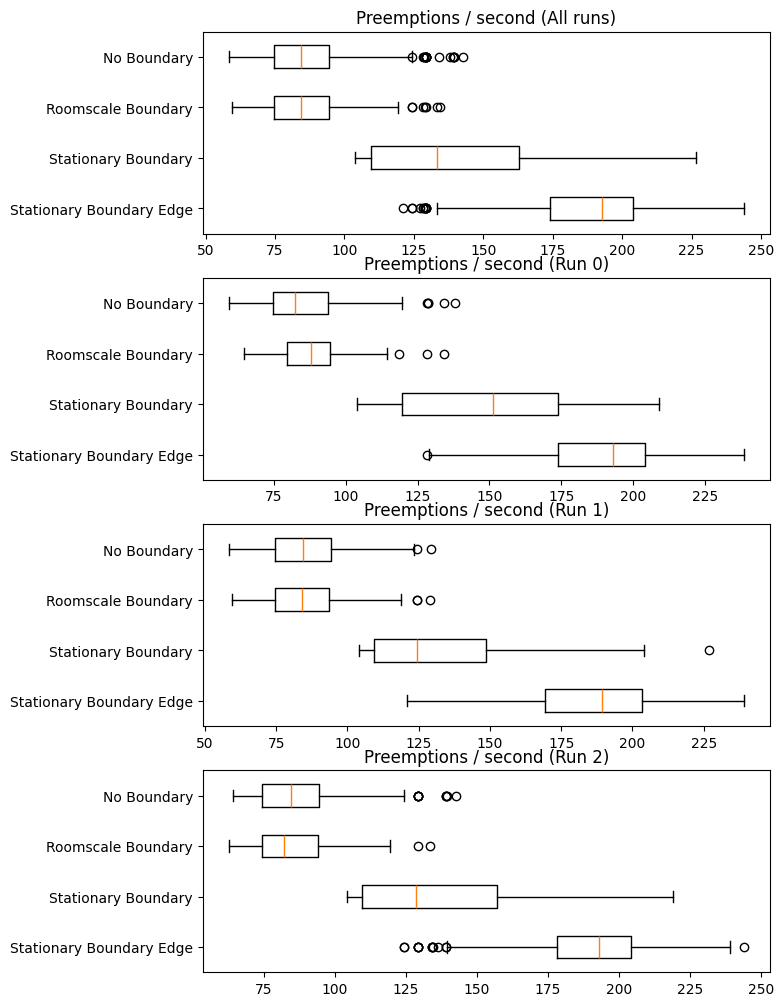

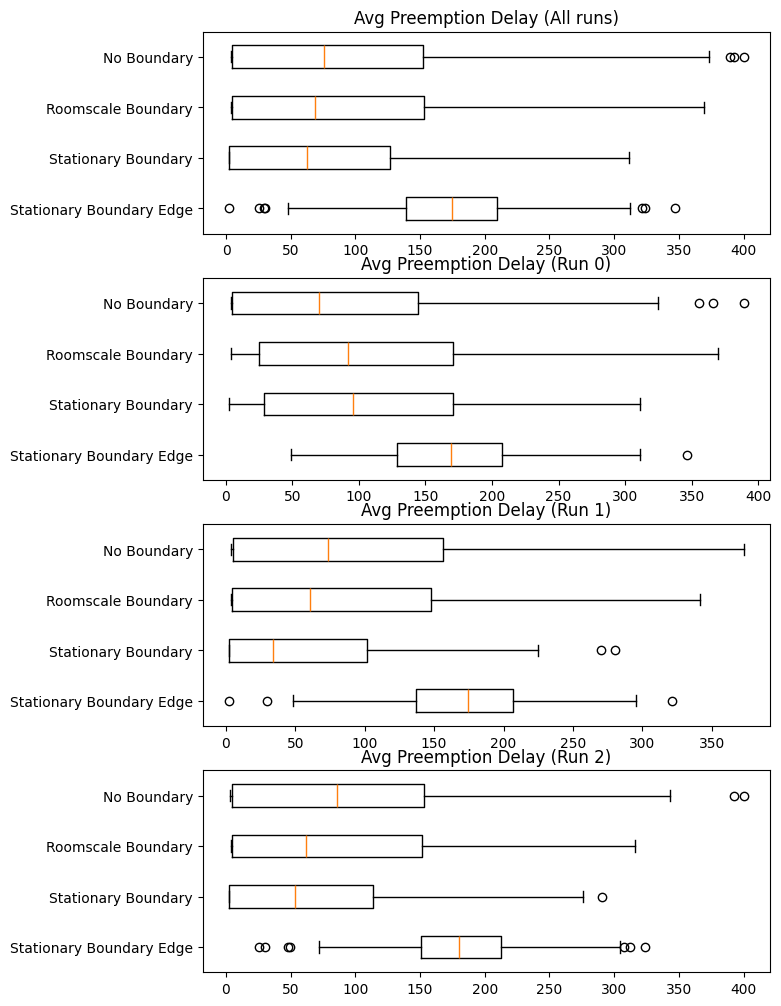

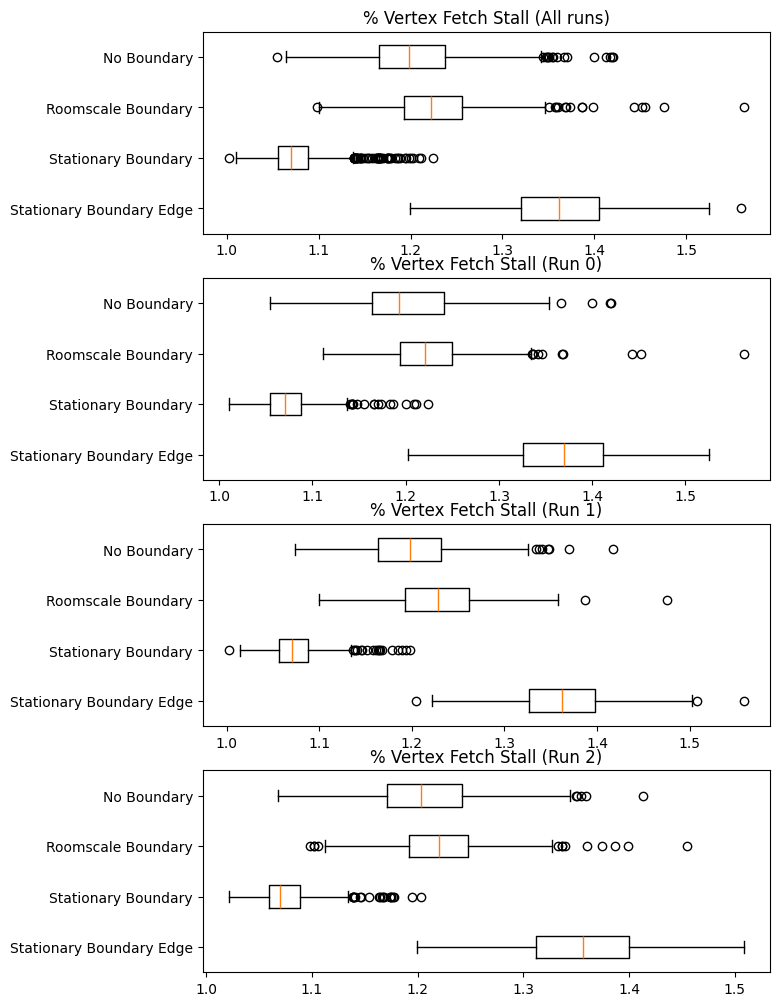

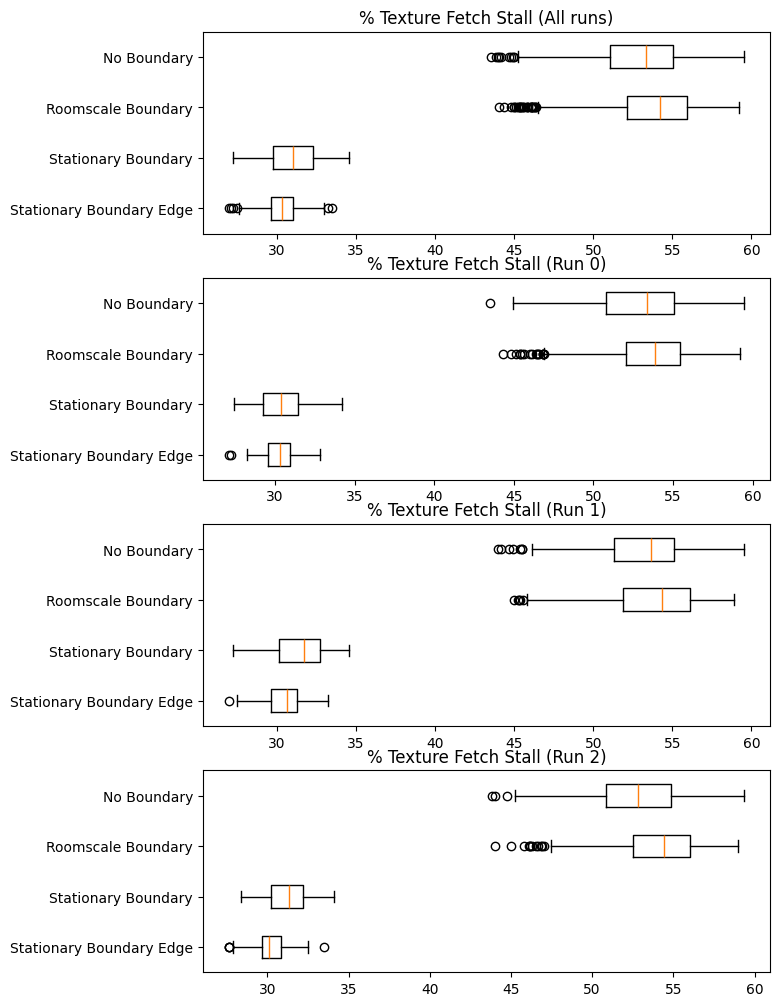

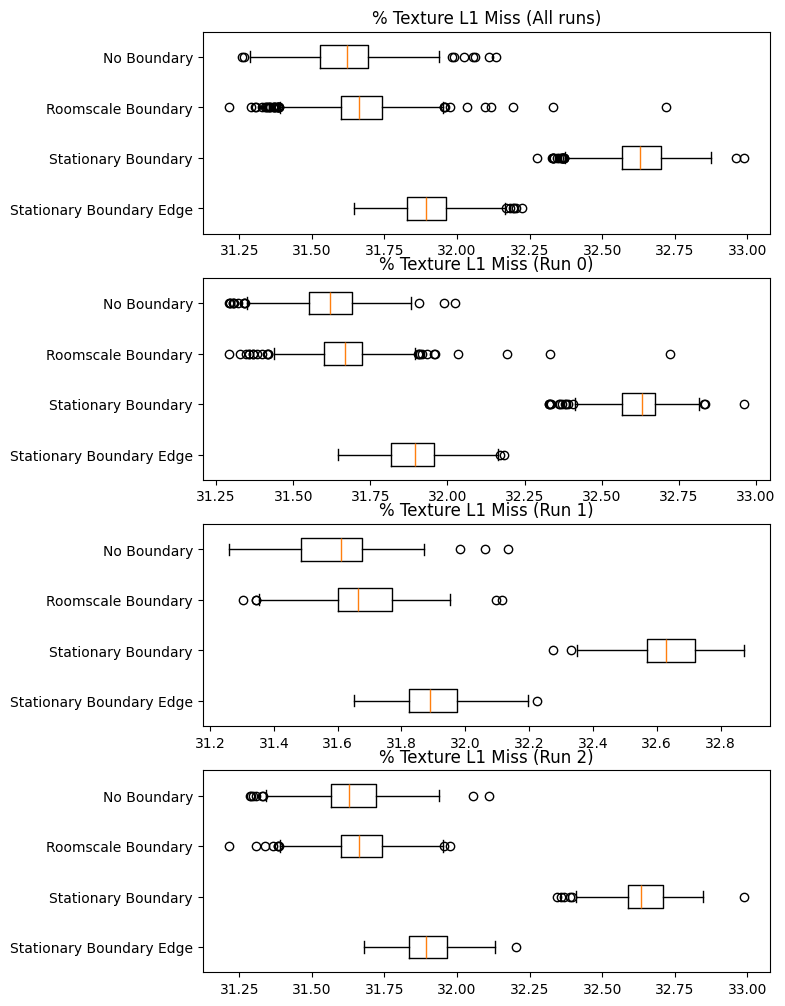

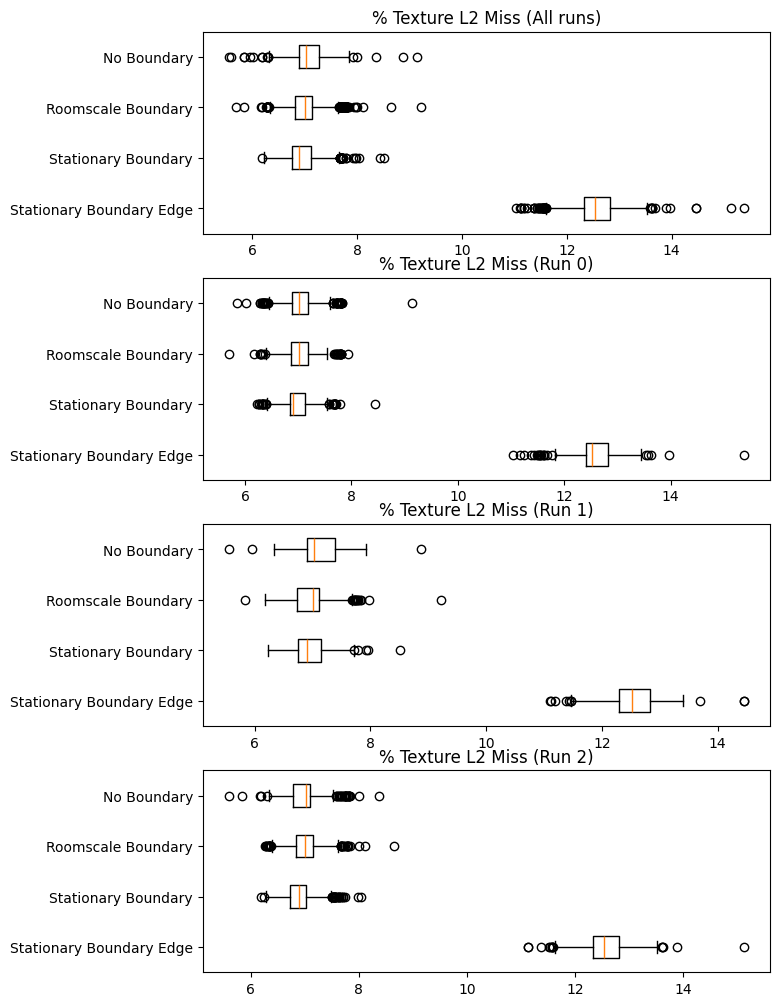

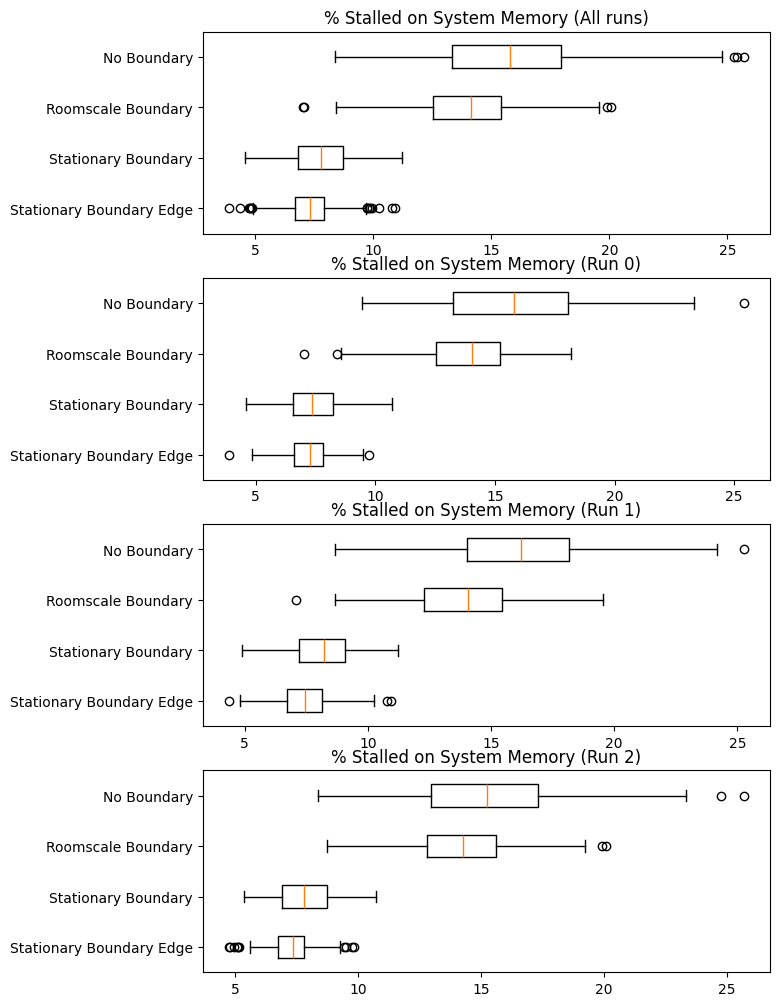

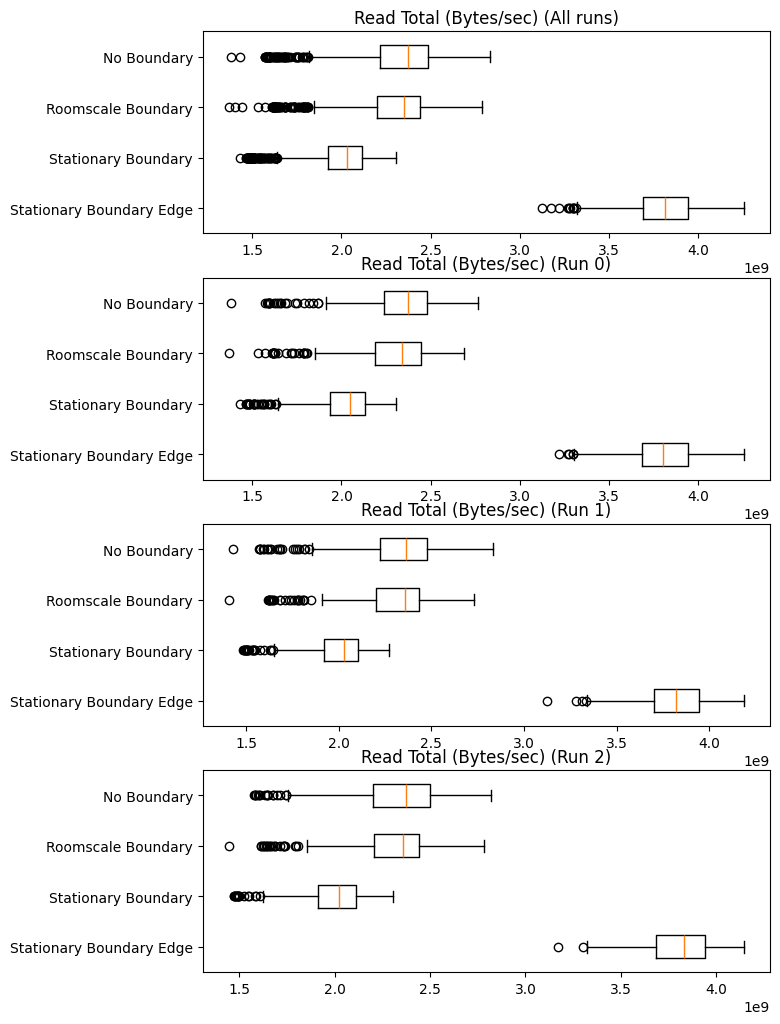

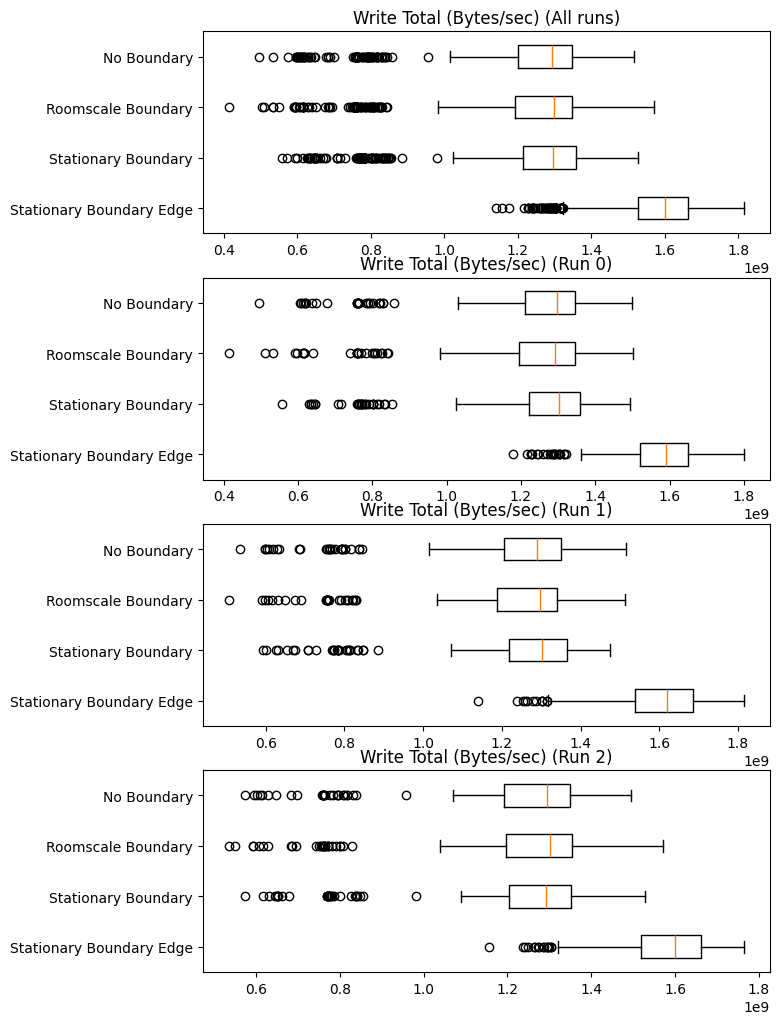

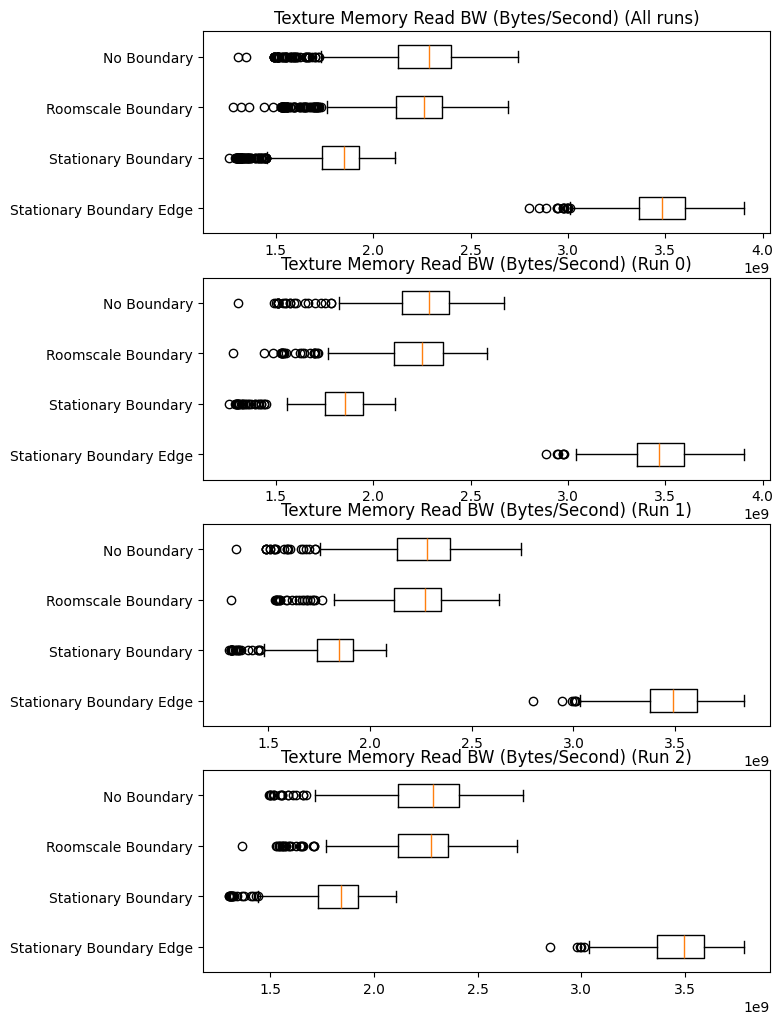

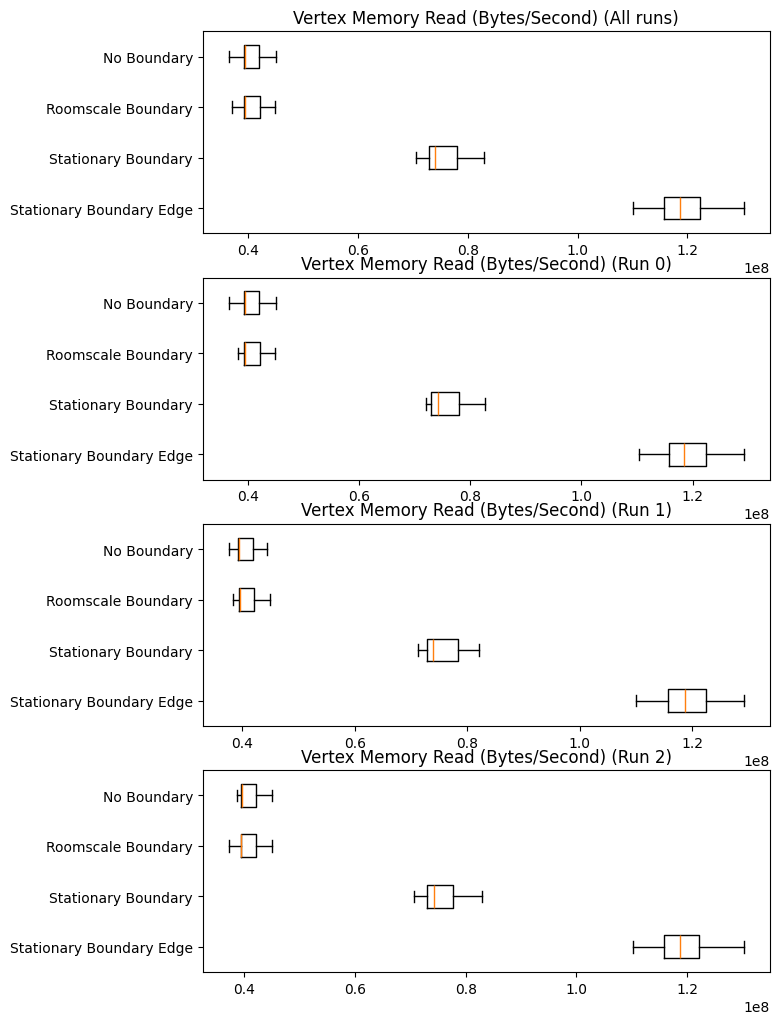

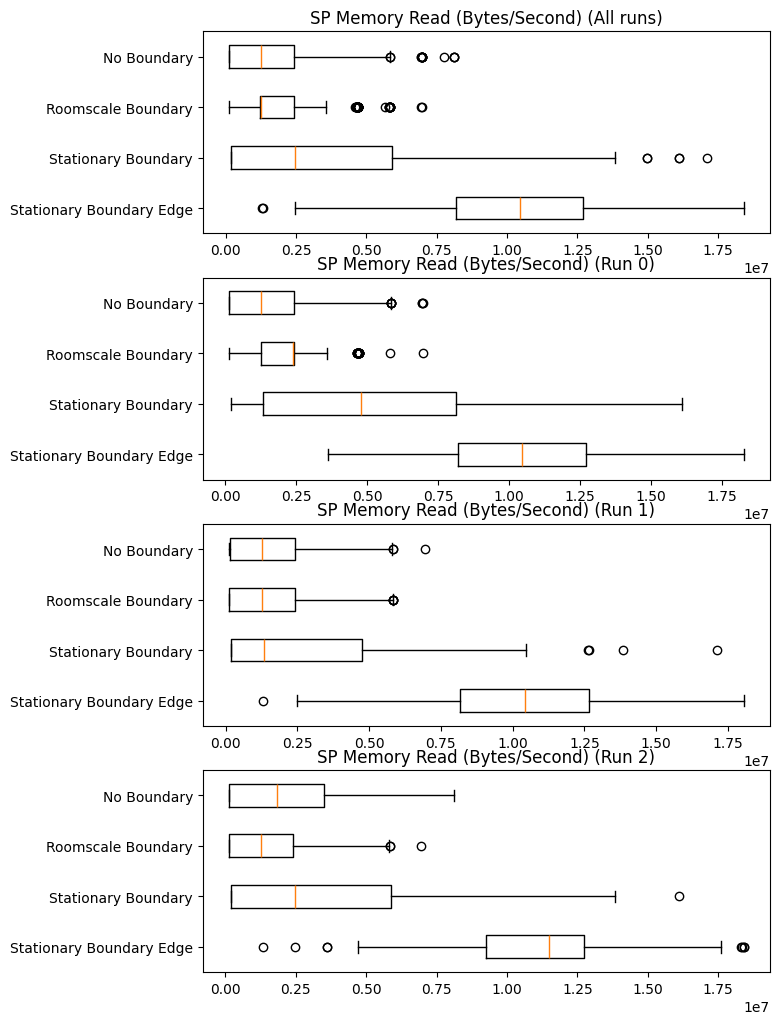

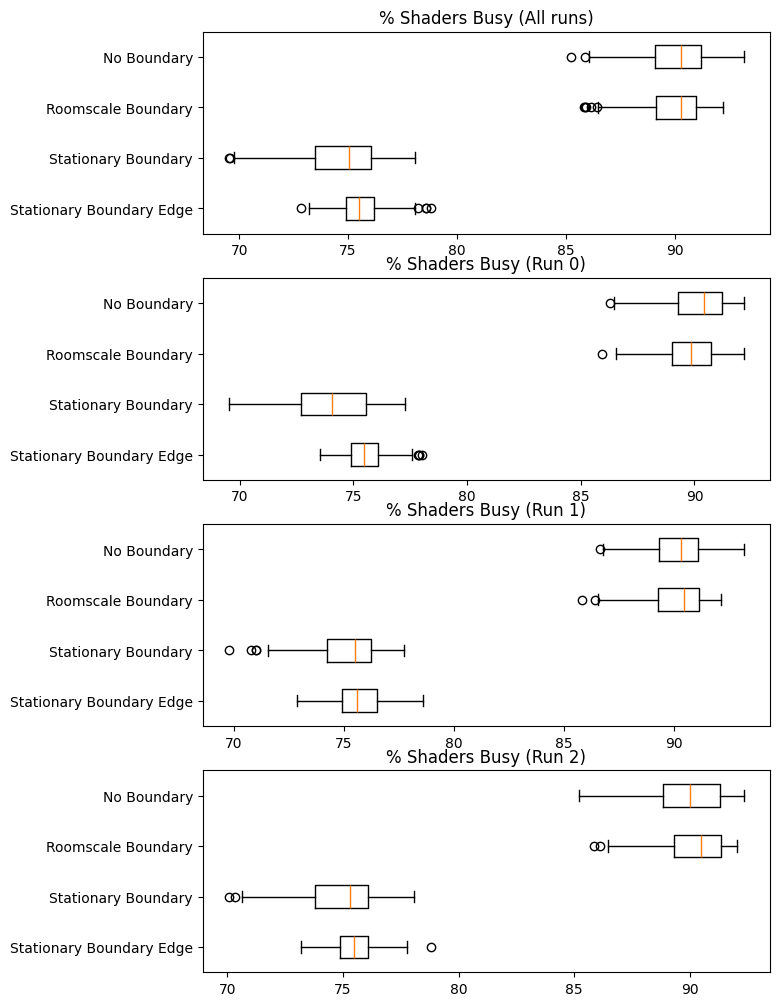

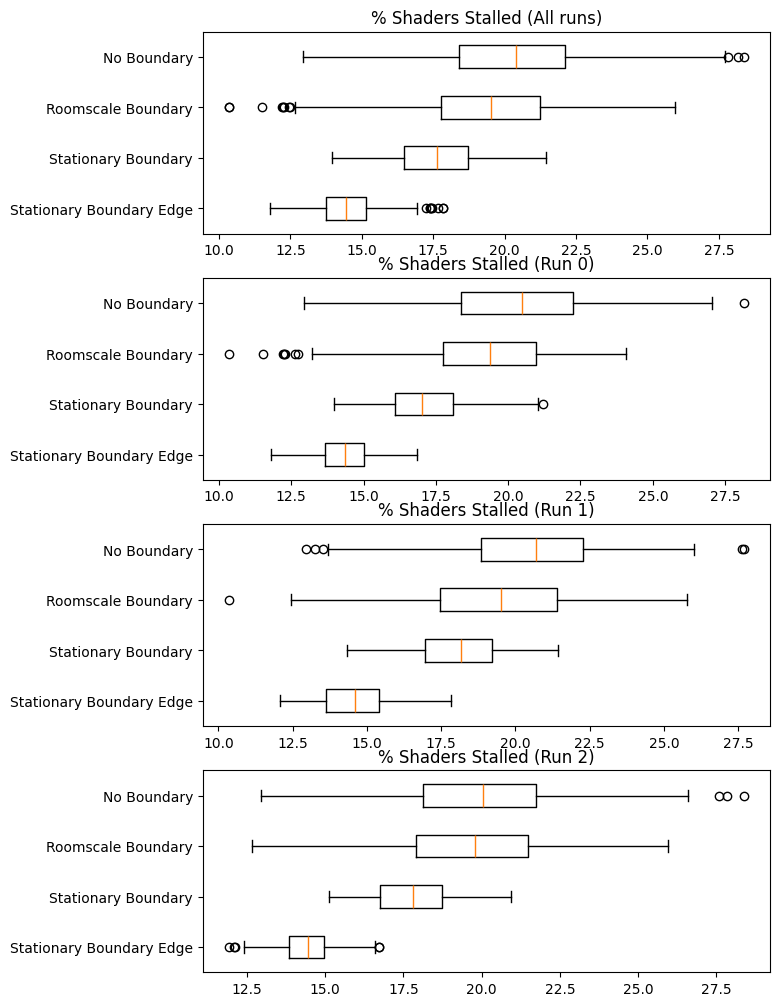

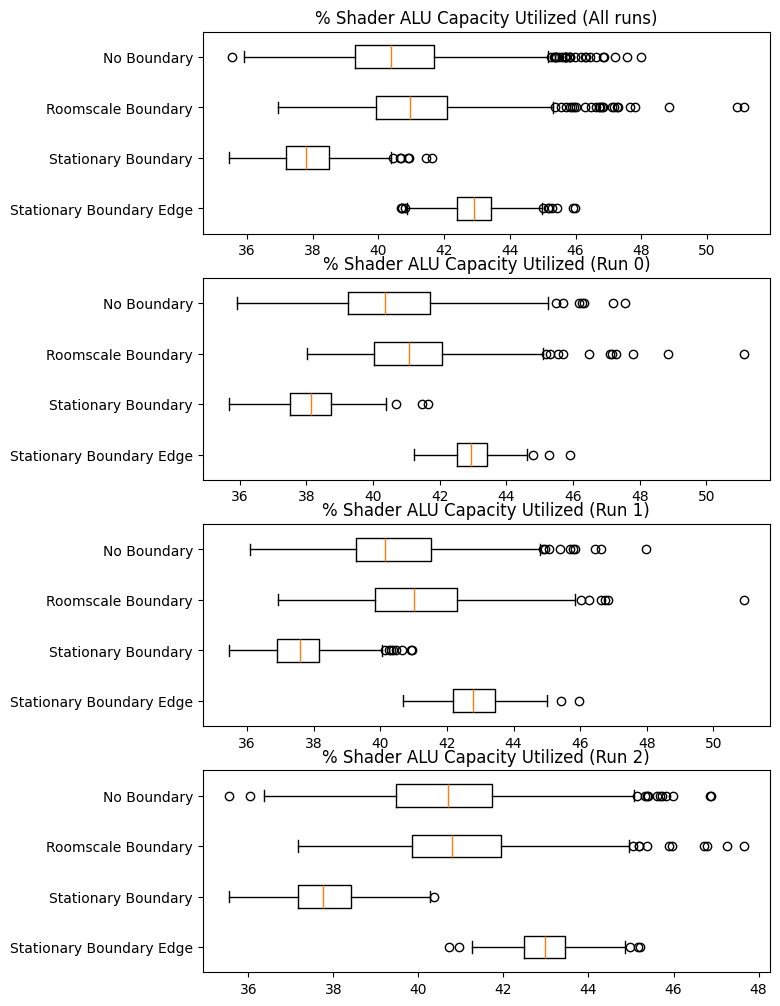

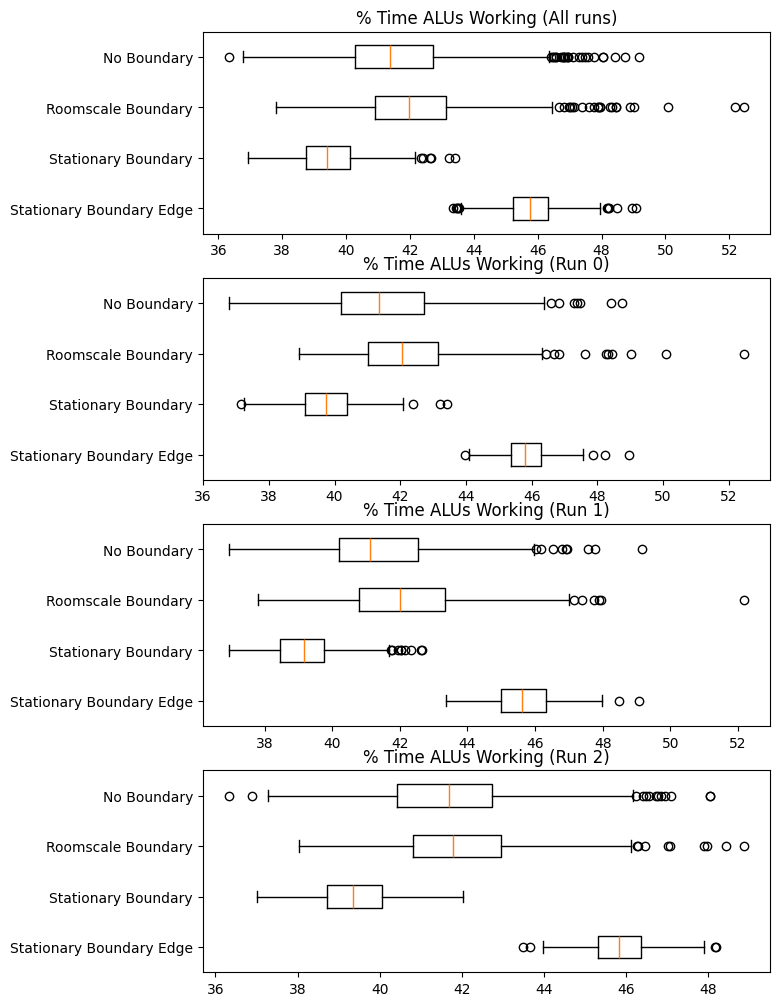

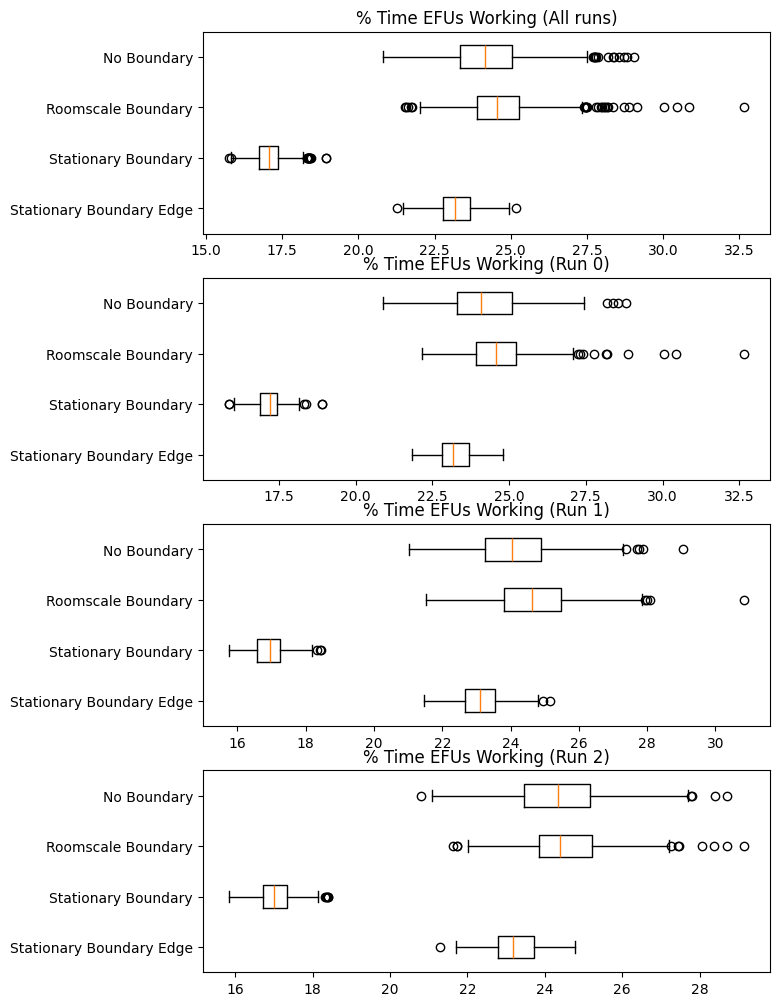

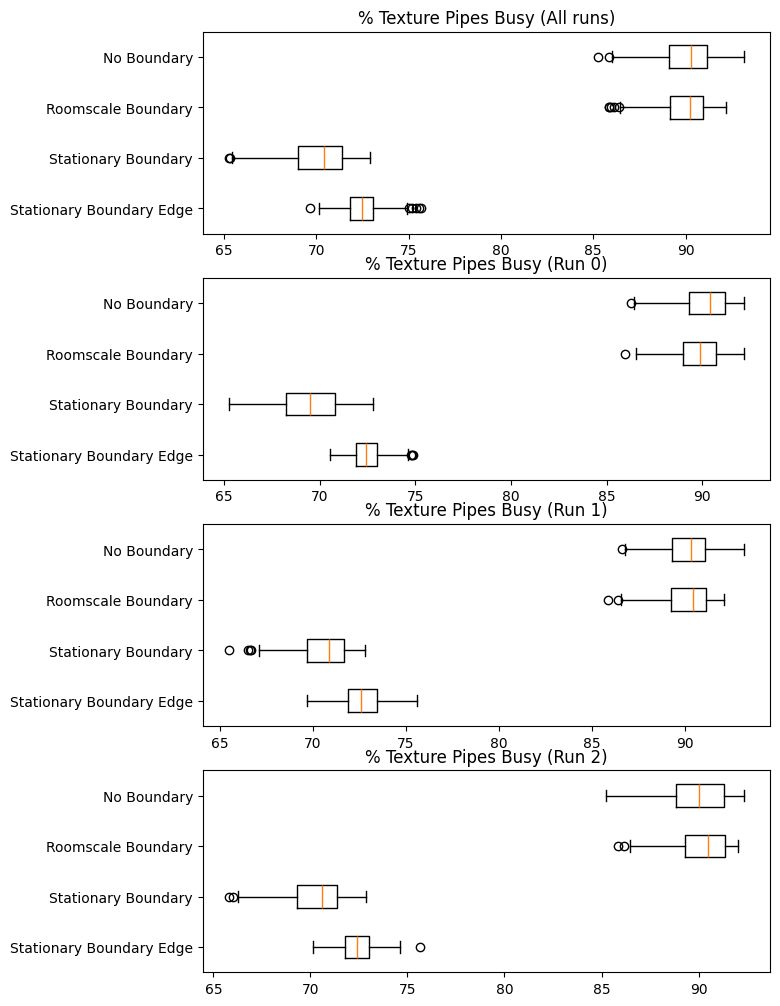

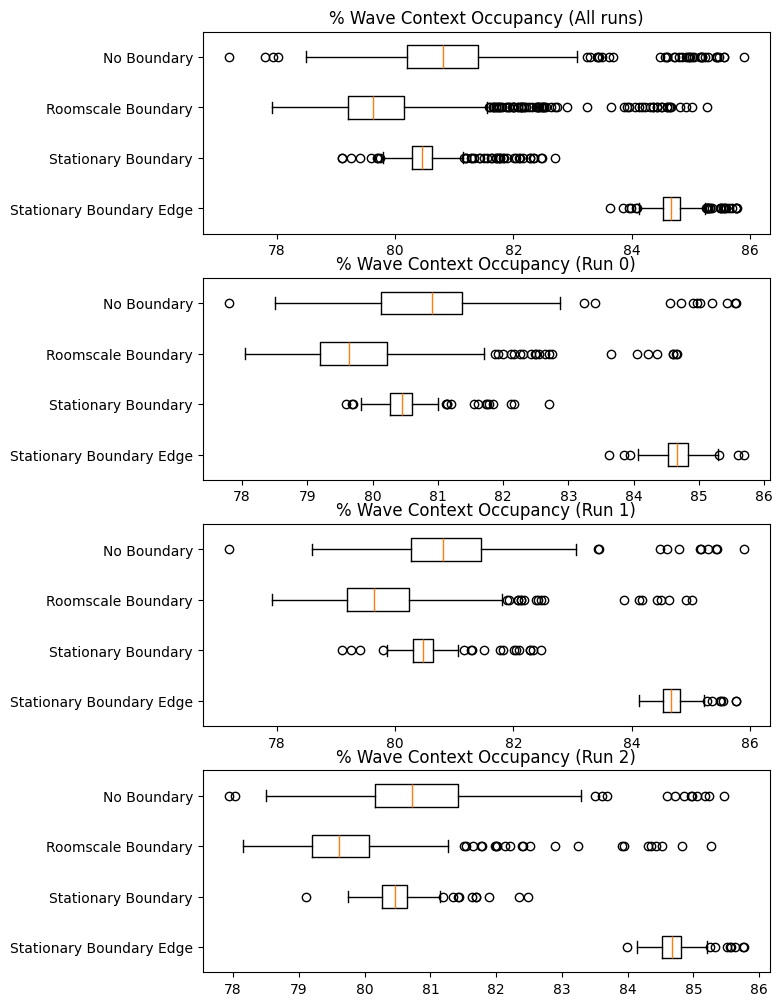

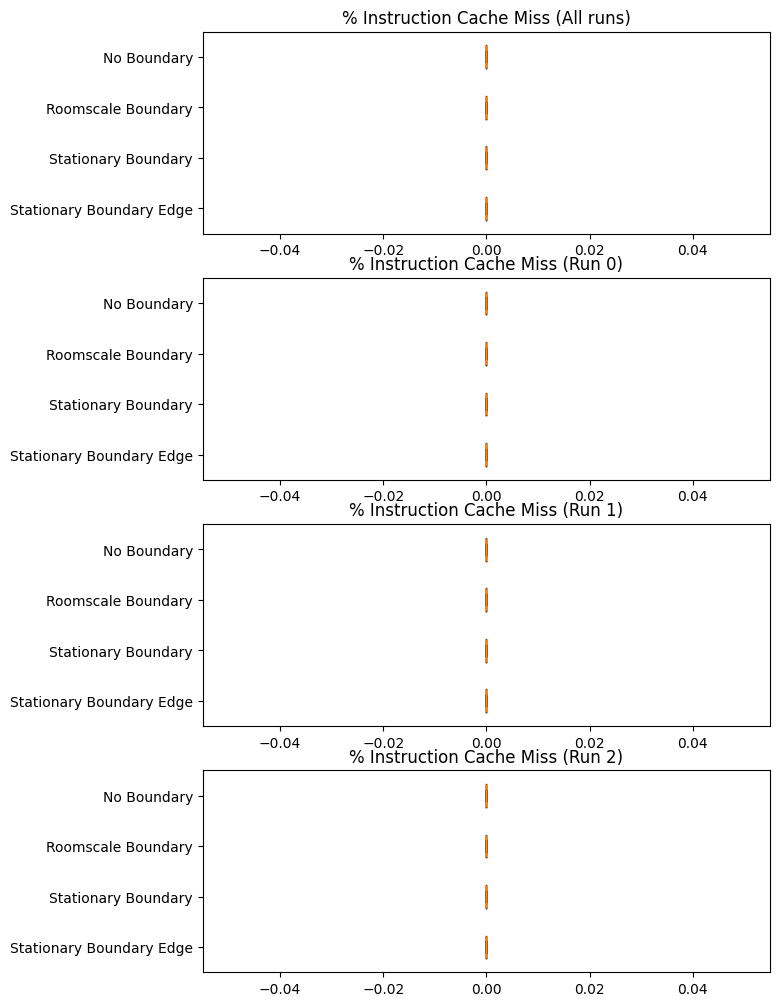

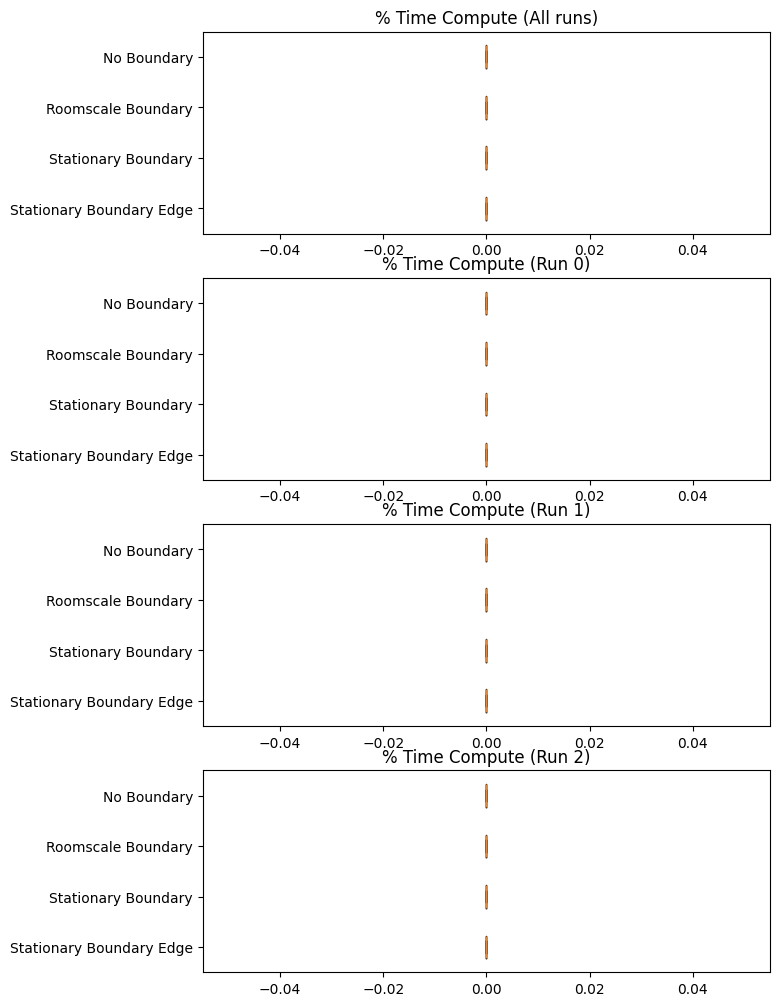

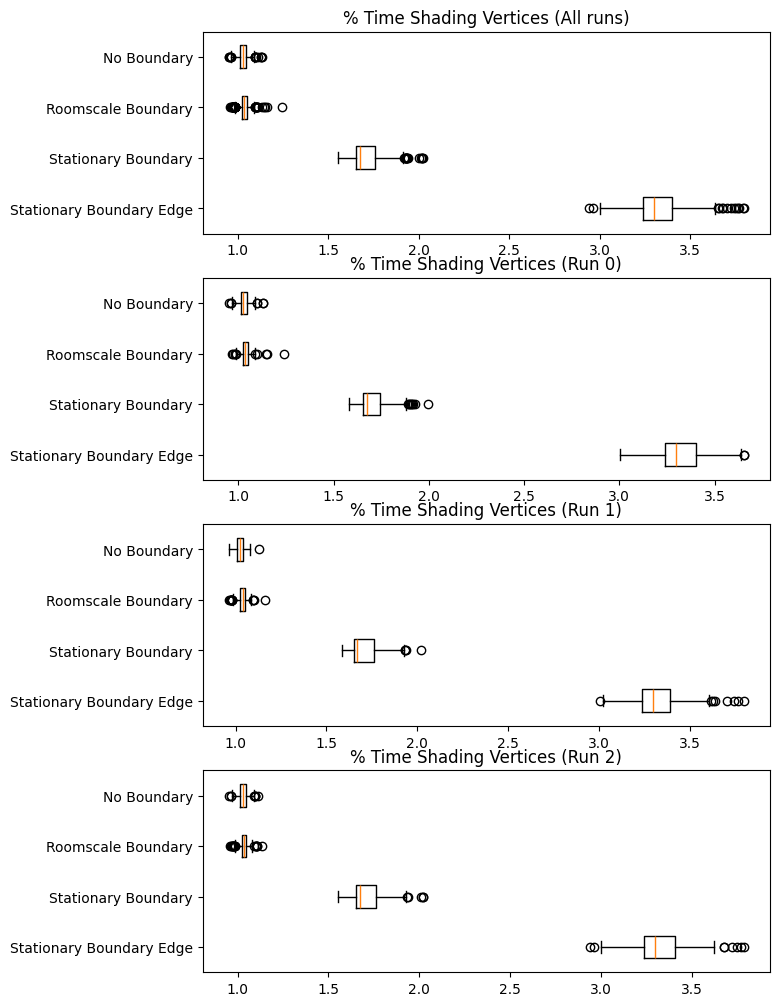

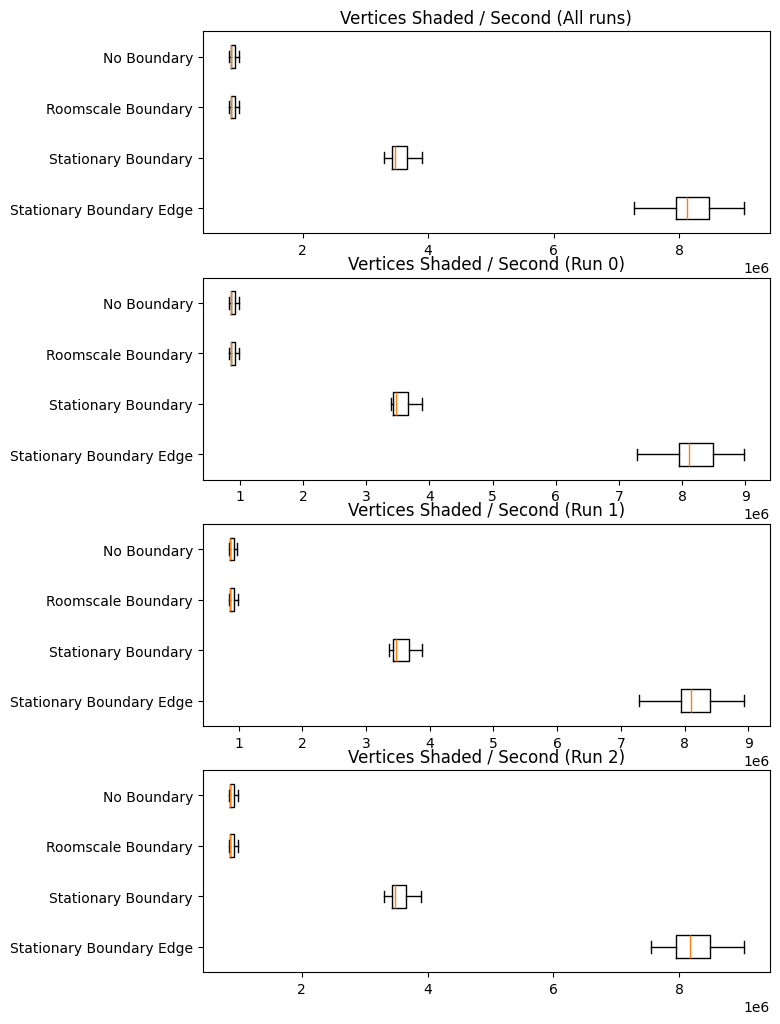

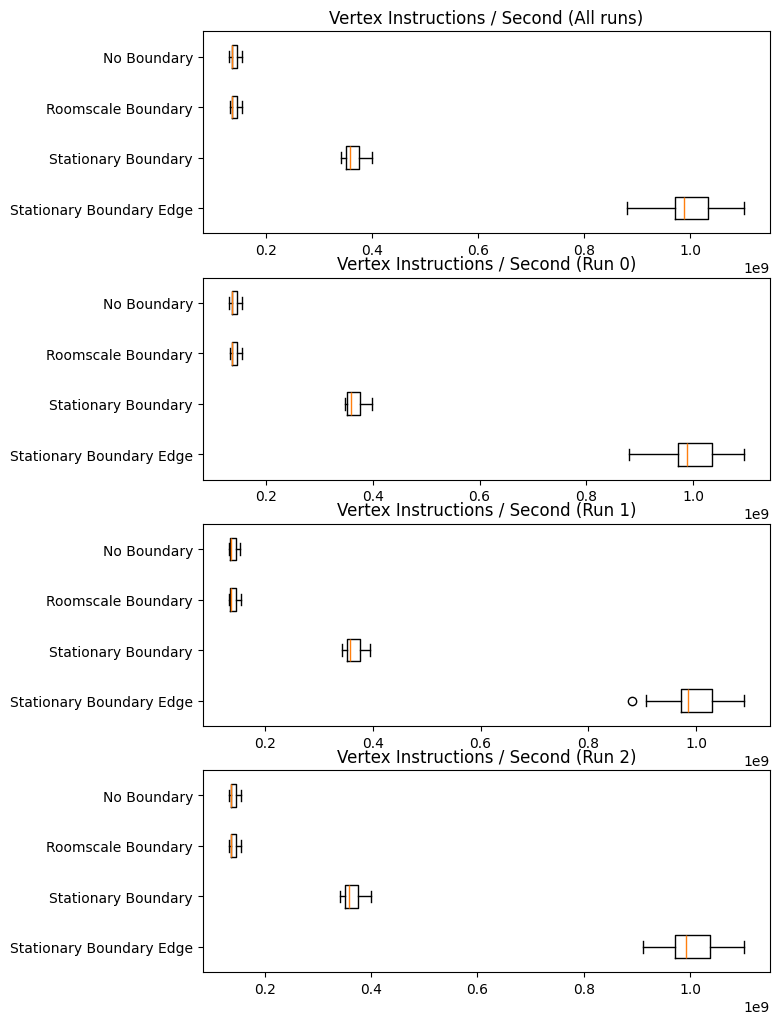

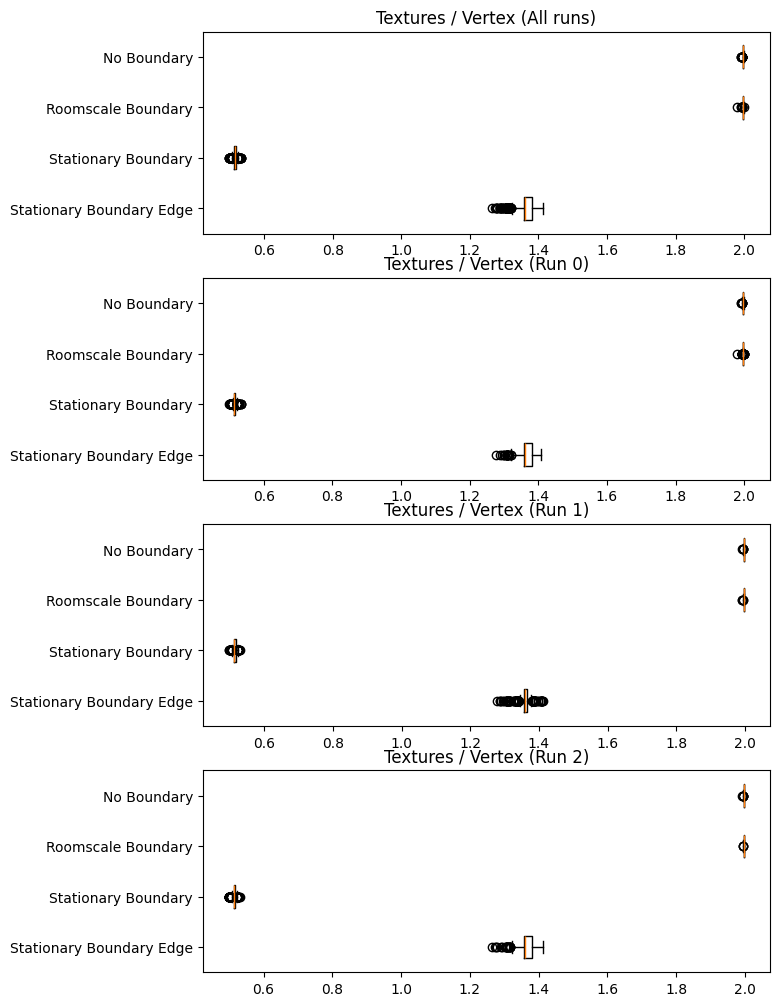

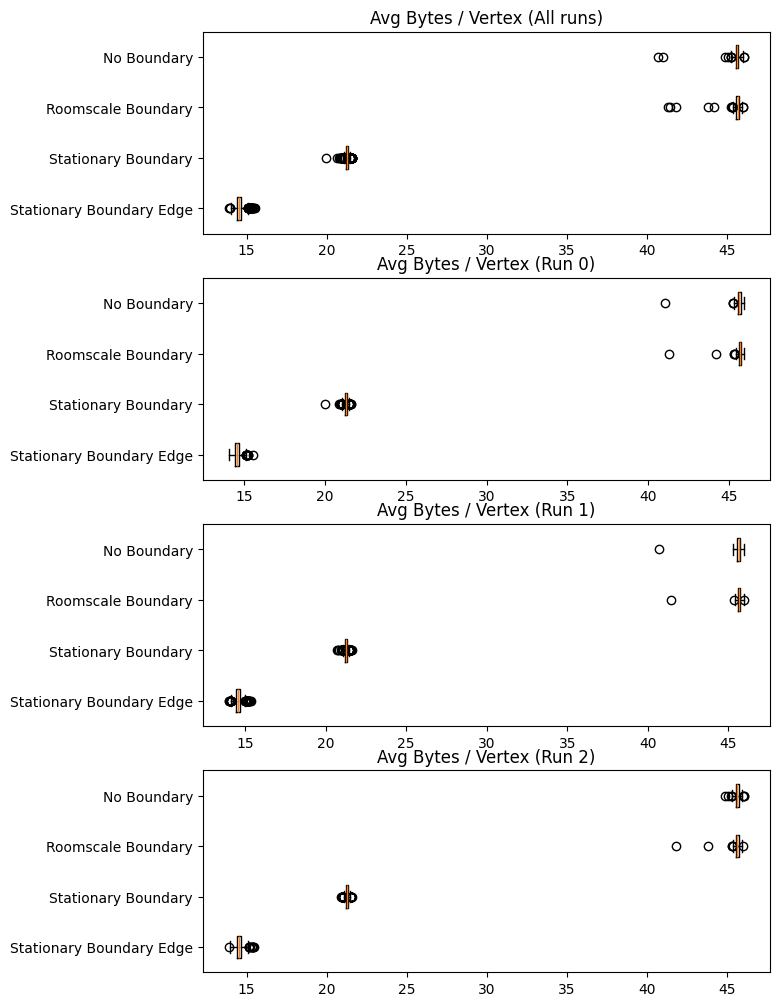

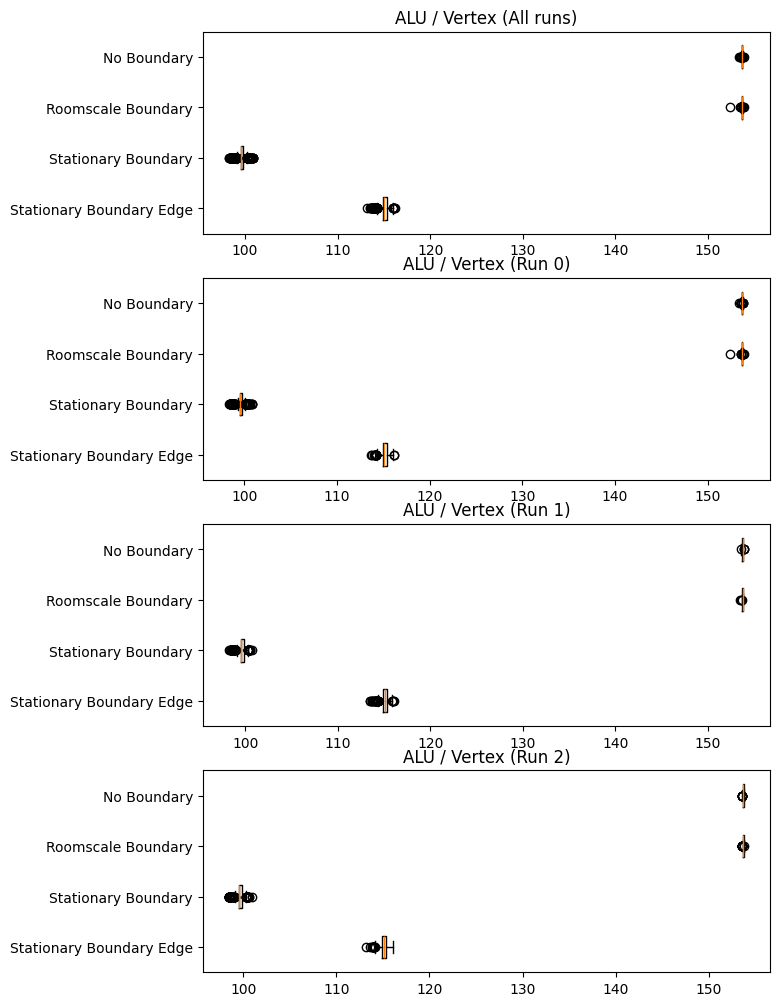

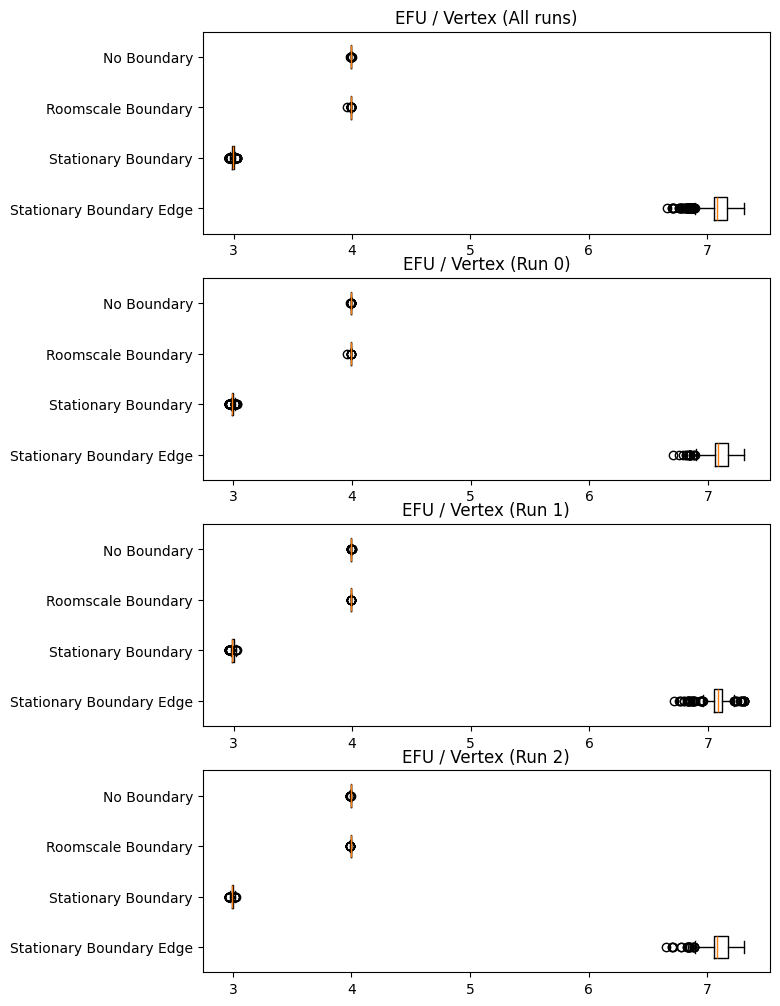

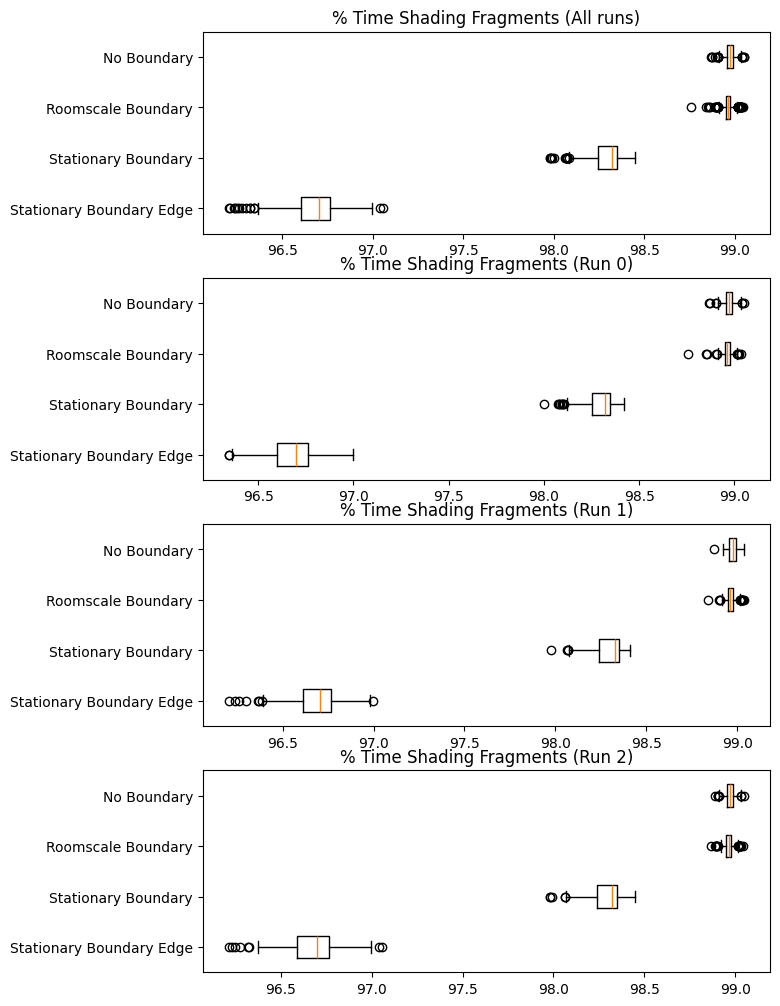

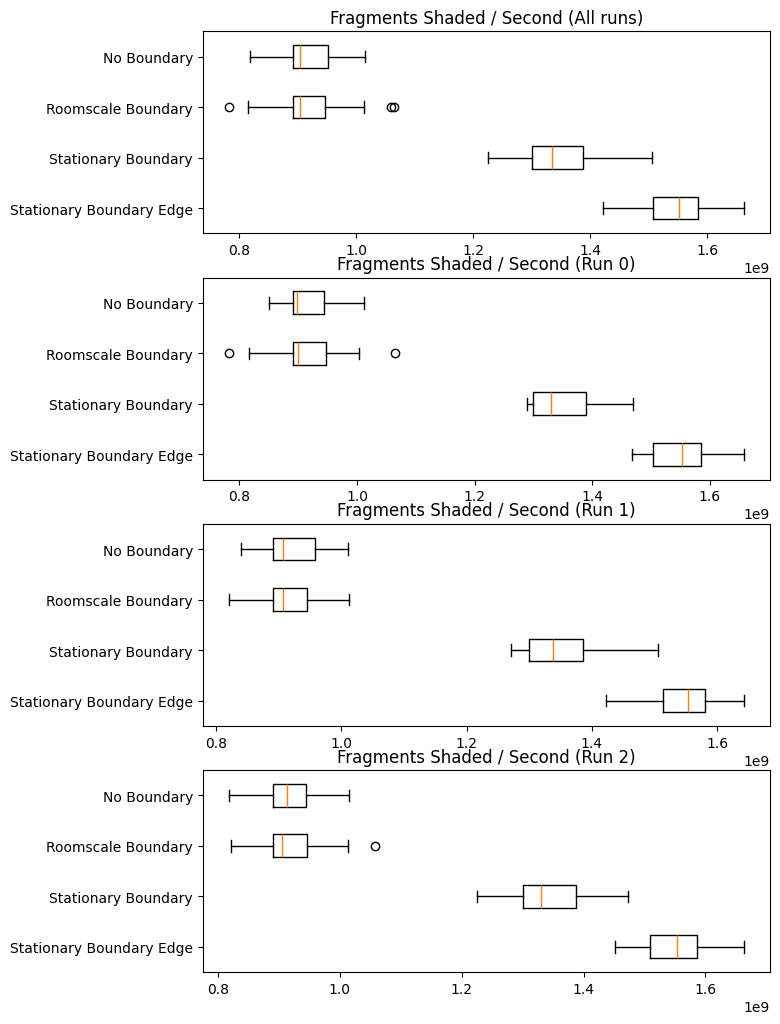

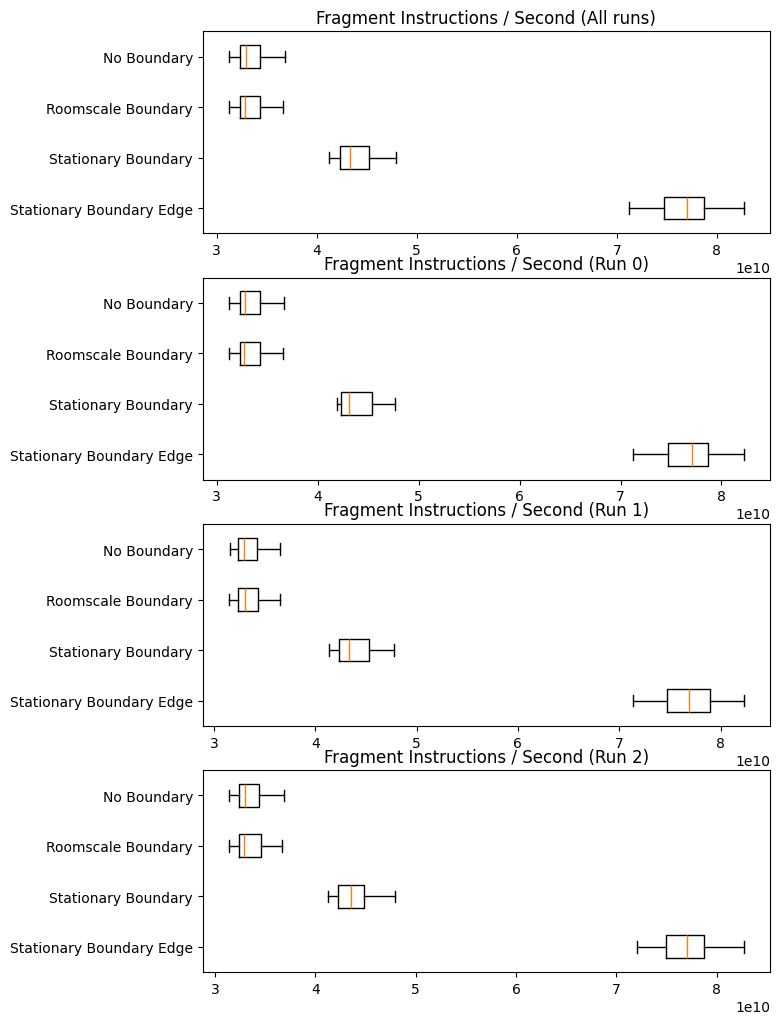

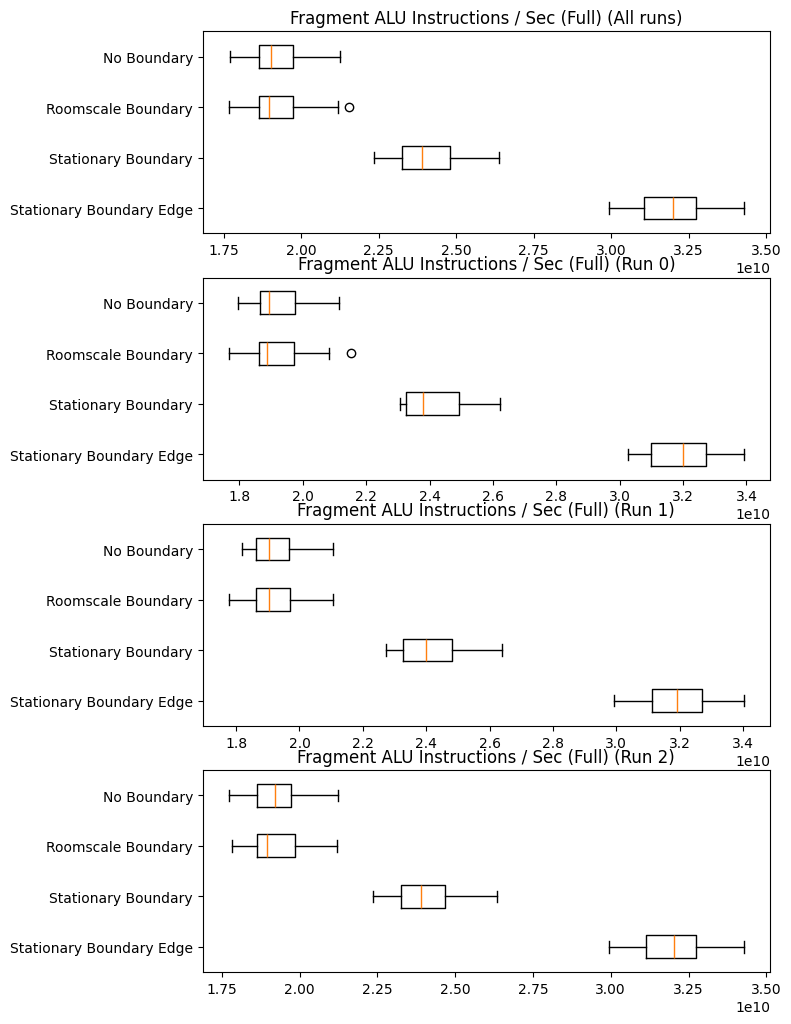

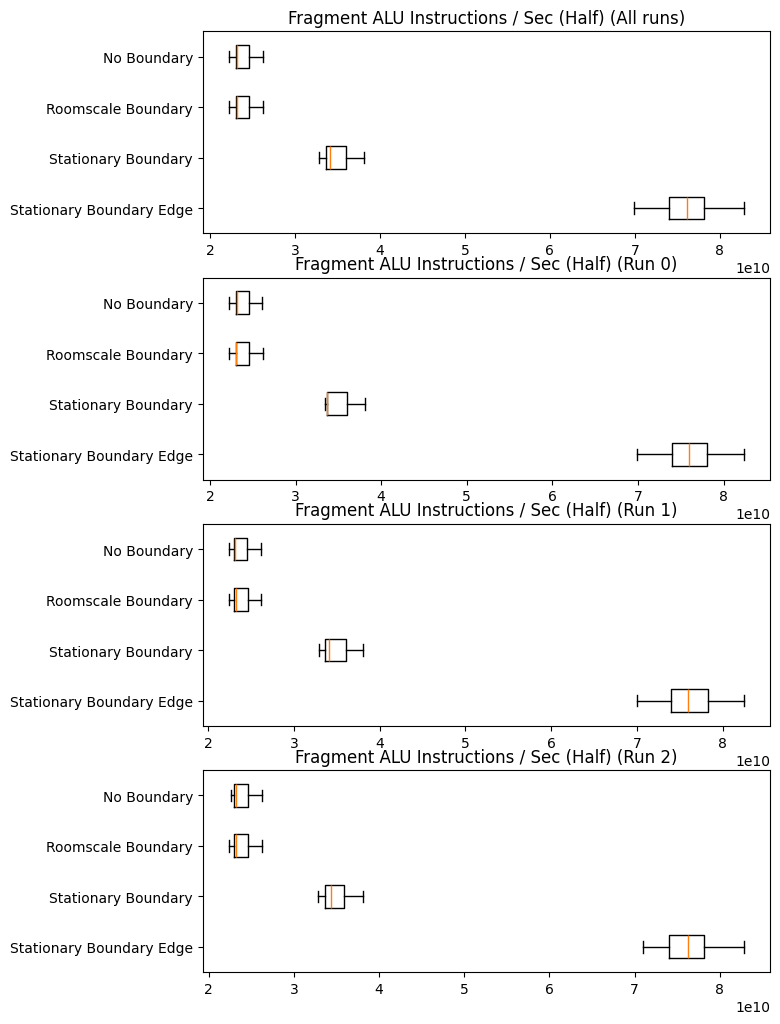

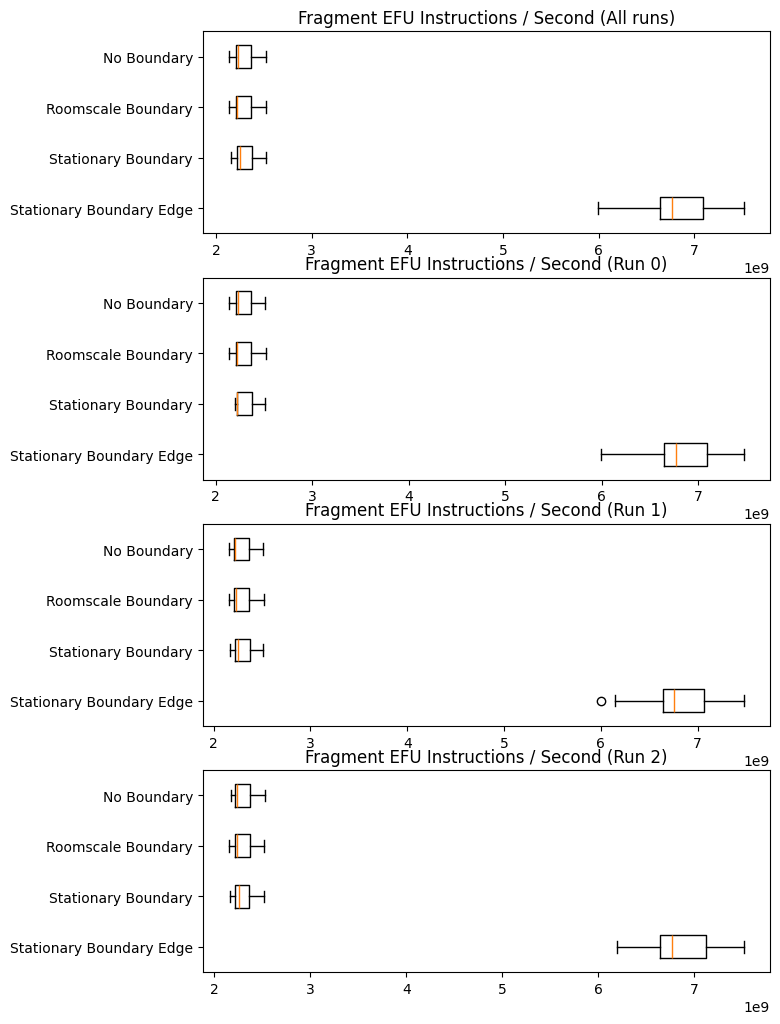

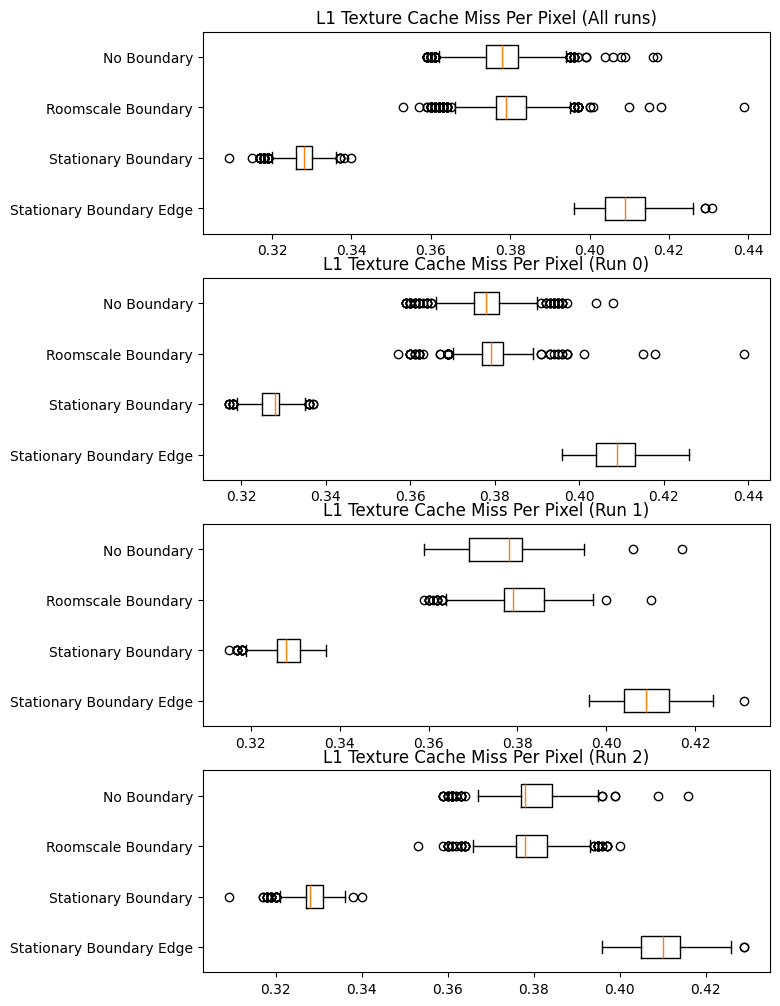

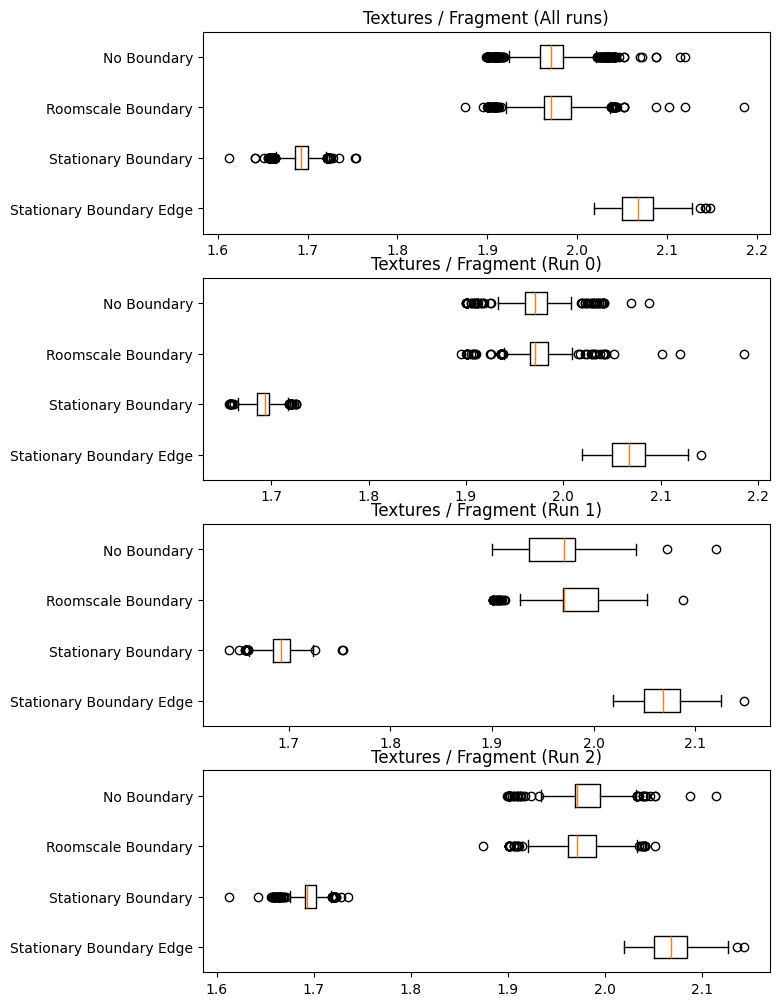

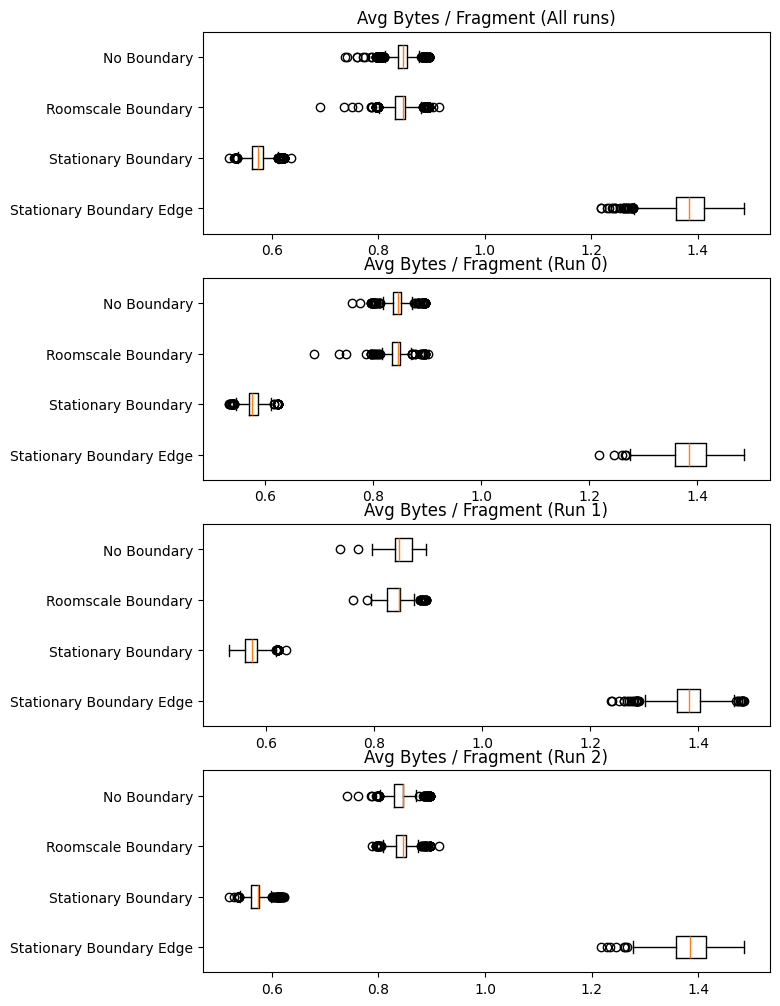

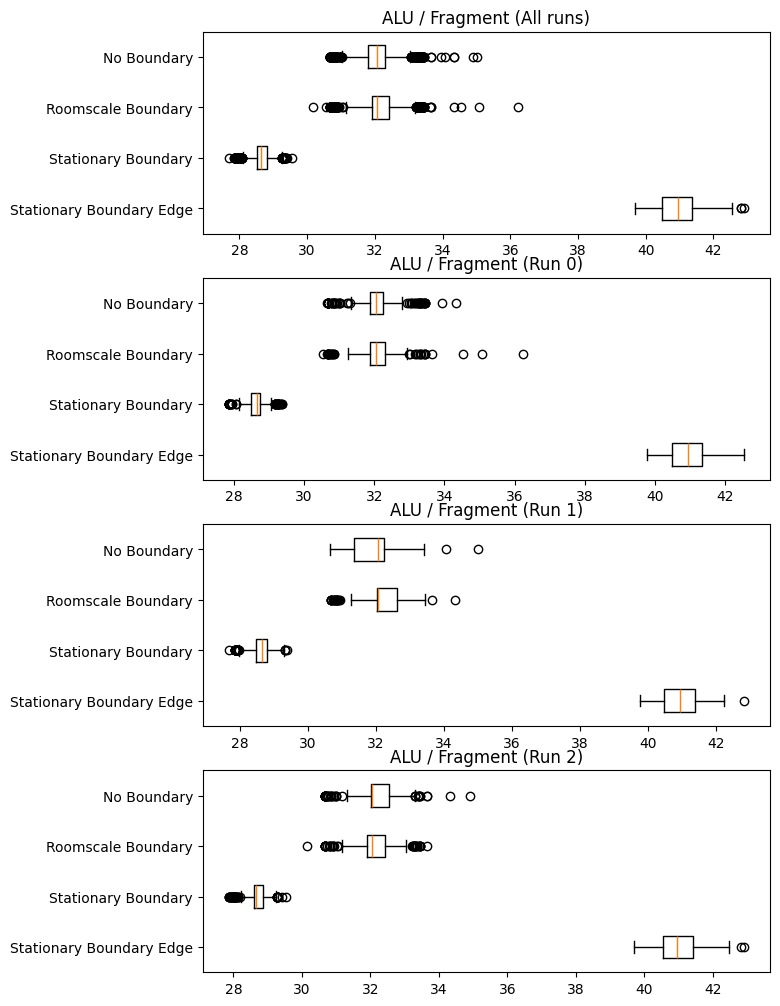

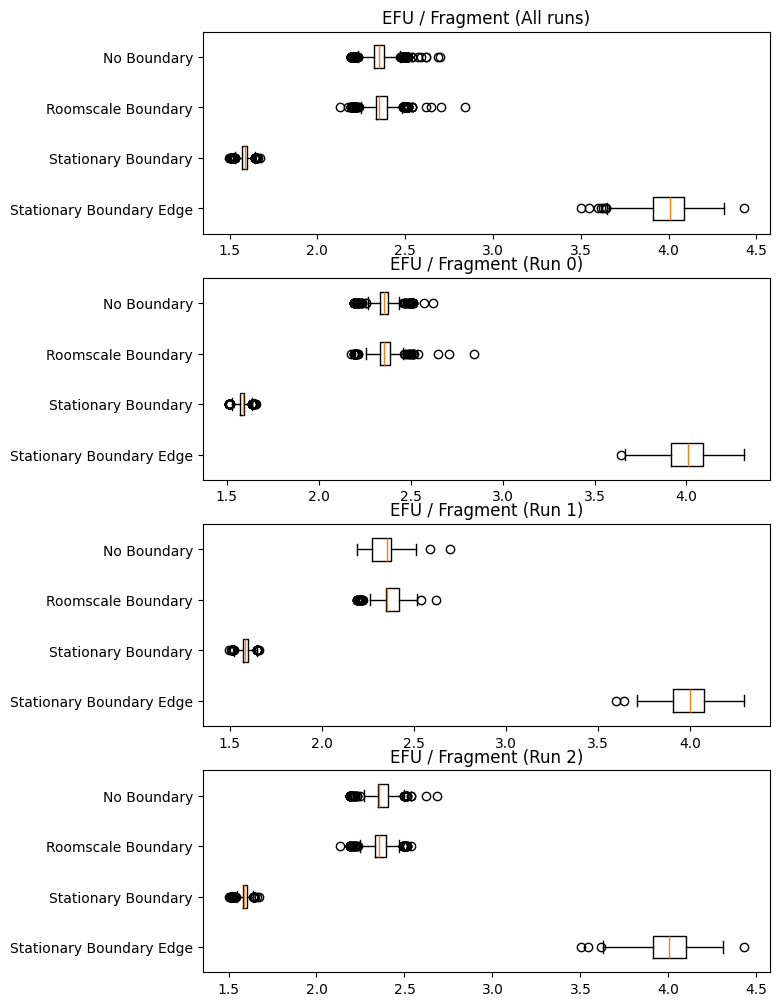

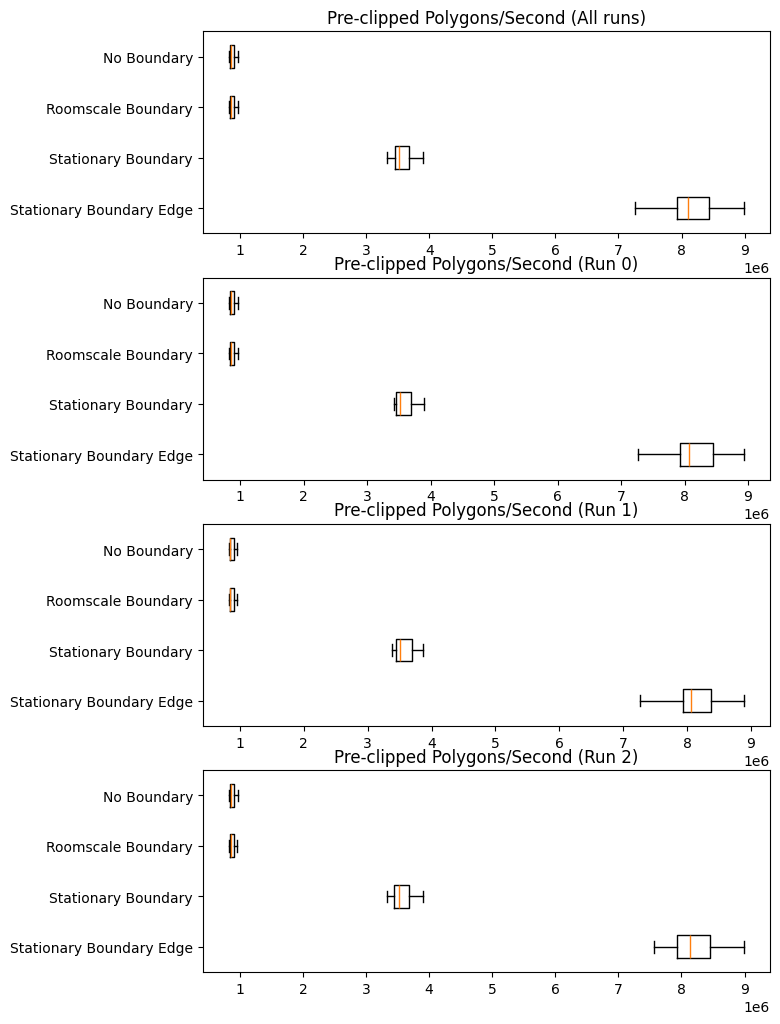

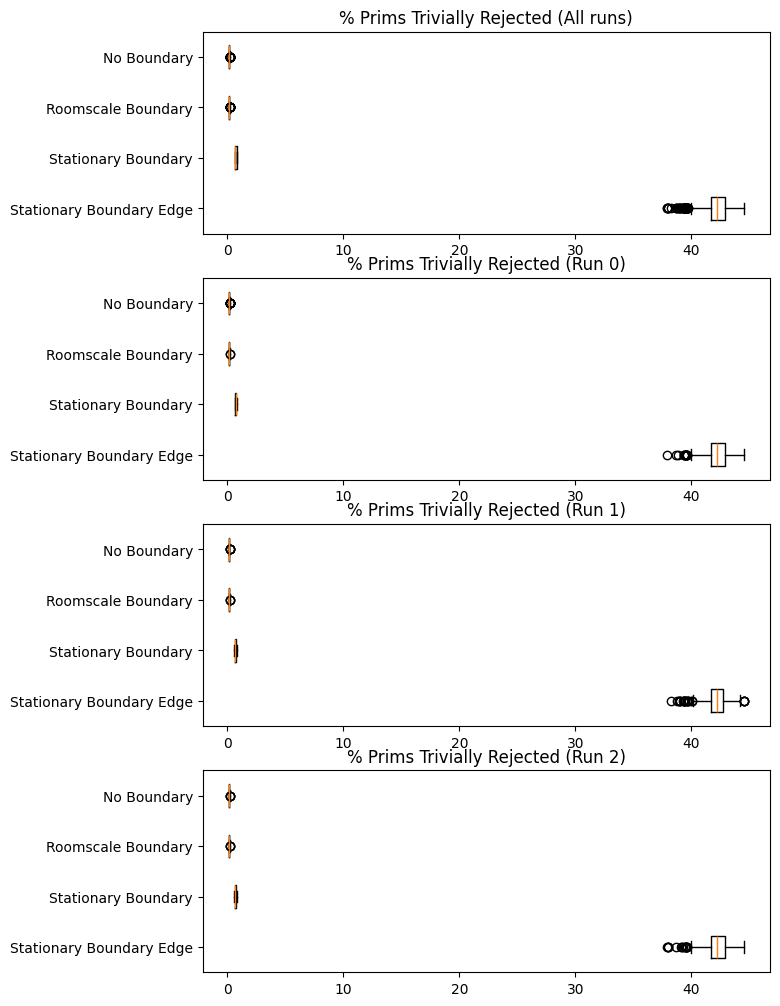

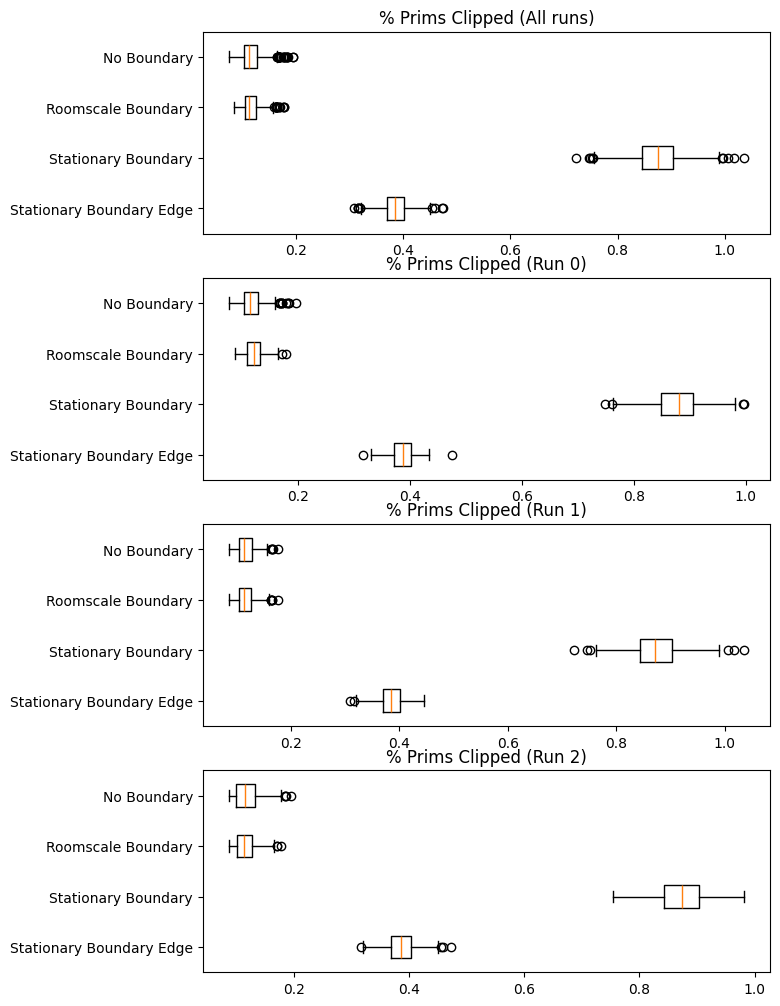

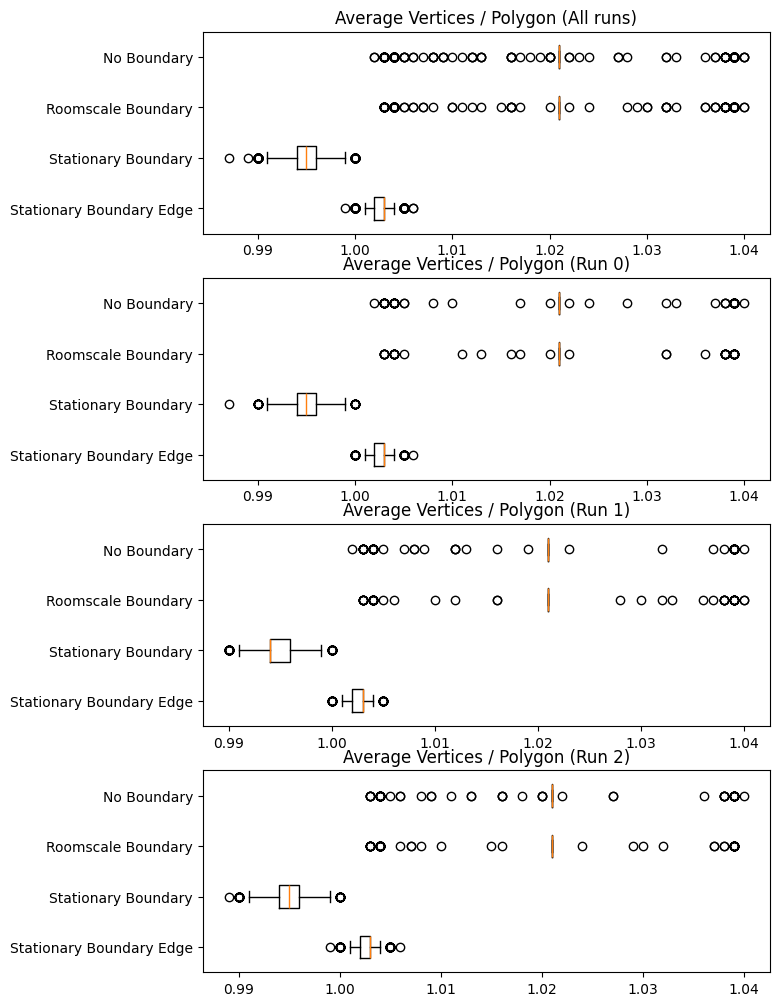

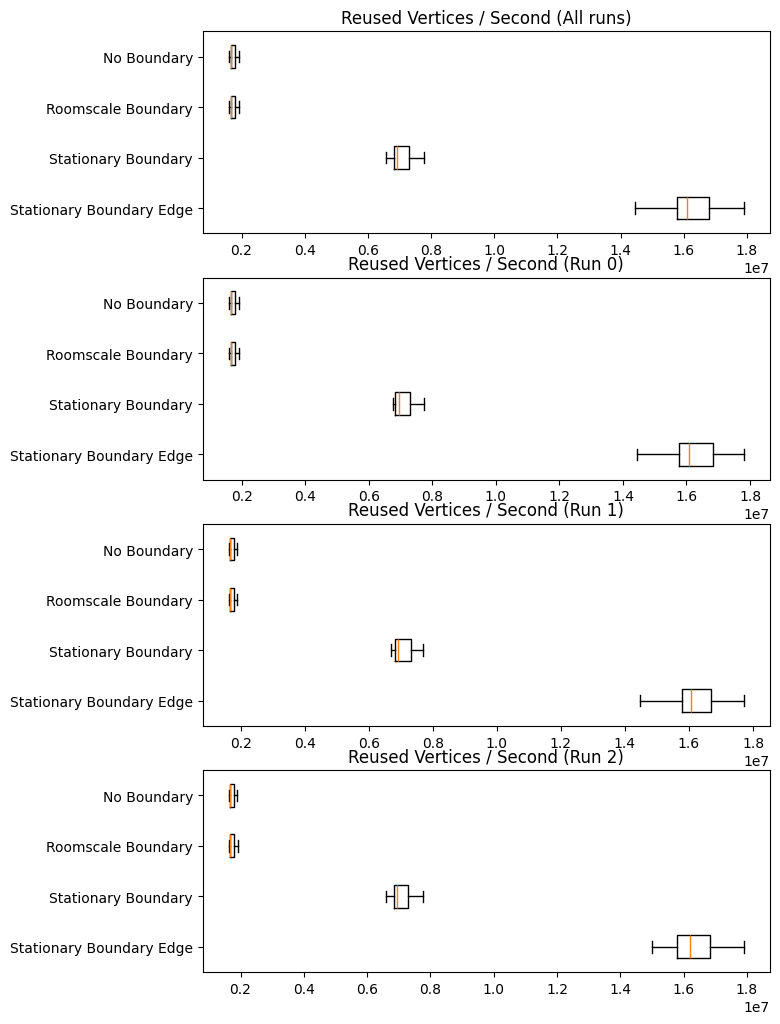

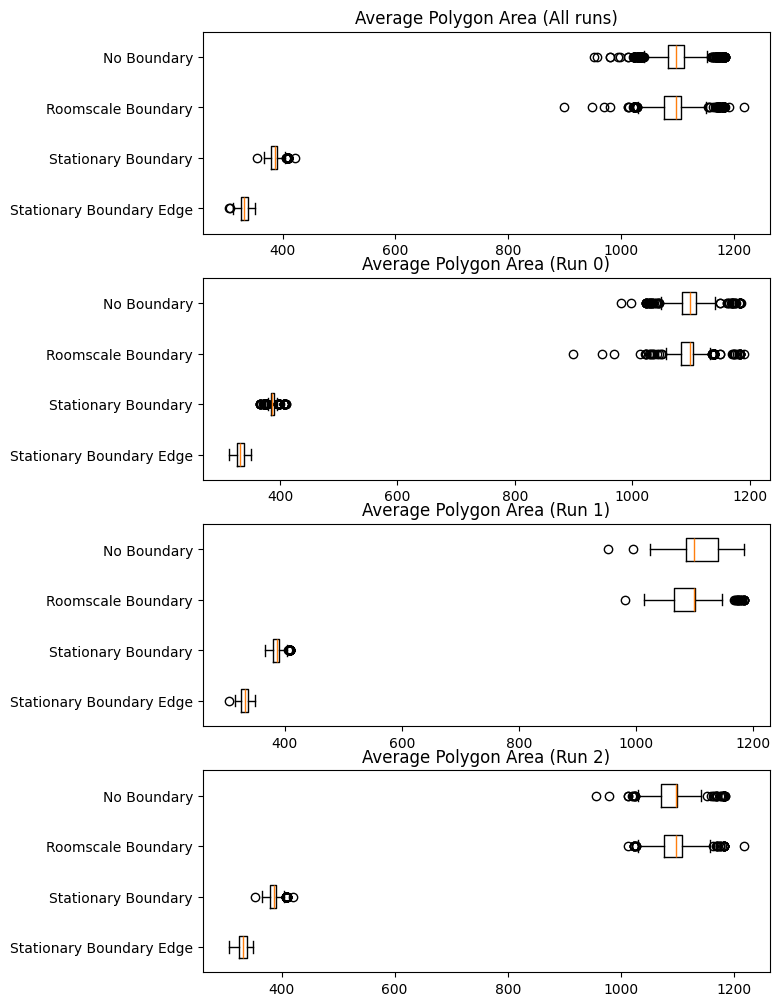

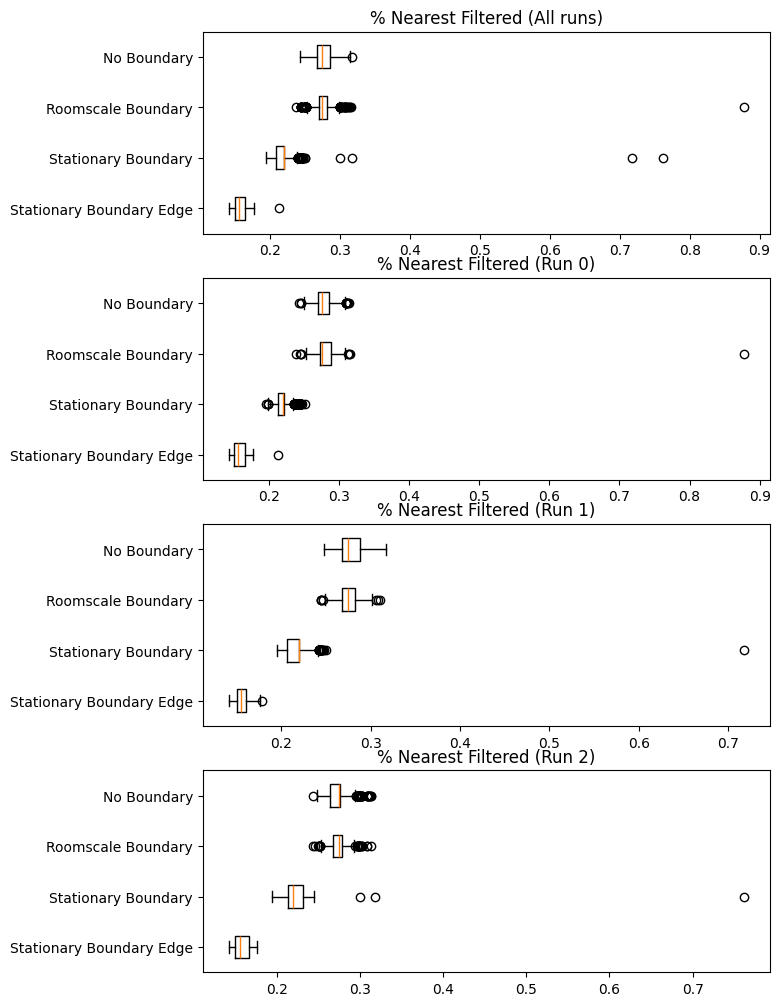

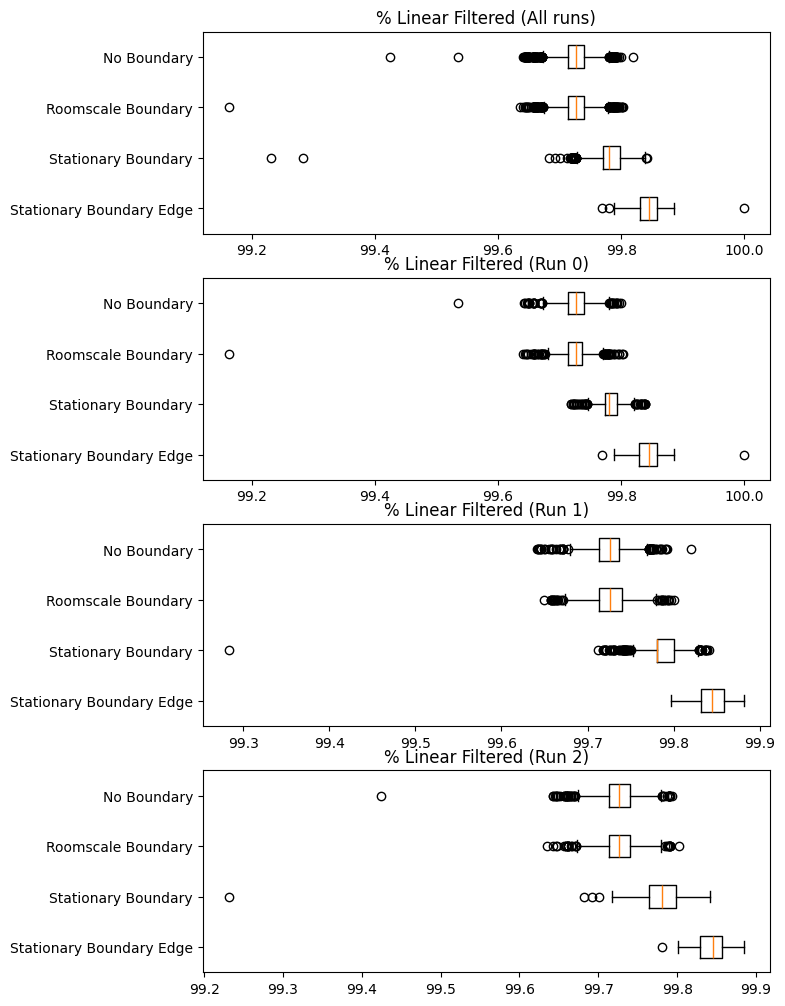

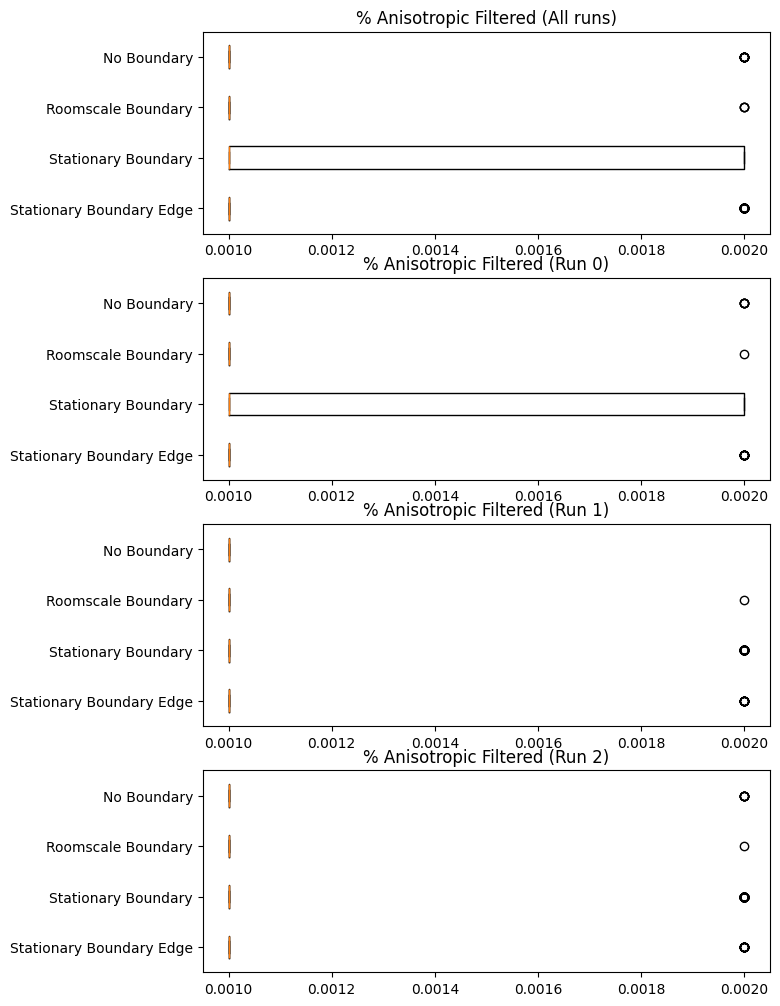

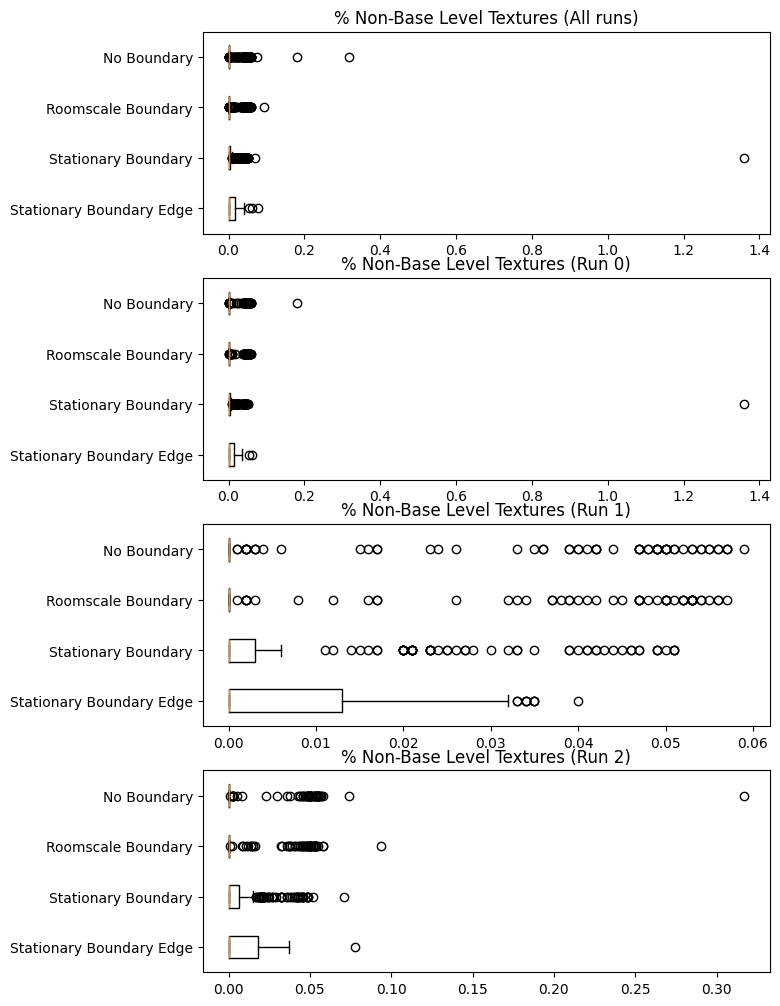

Cannot plot device
Cannot plot app
Cannot plot app_details
Cannot plot is_record
Cannot plot is_wireless
Cannot plot repetition


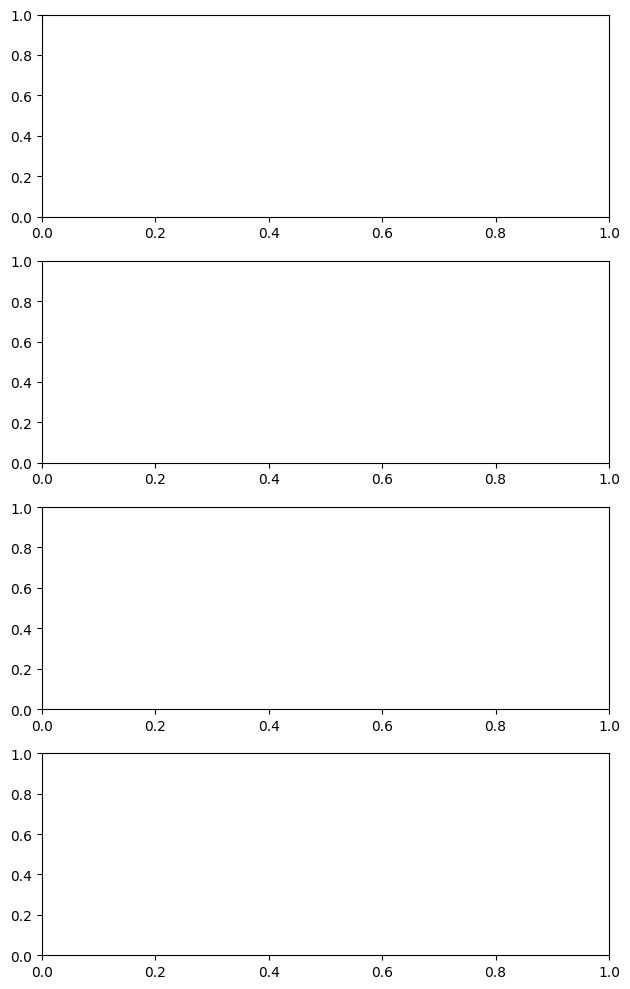

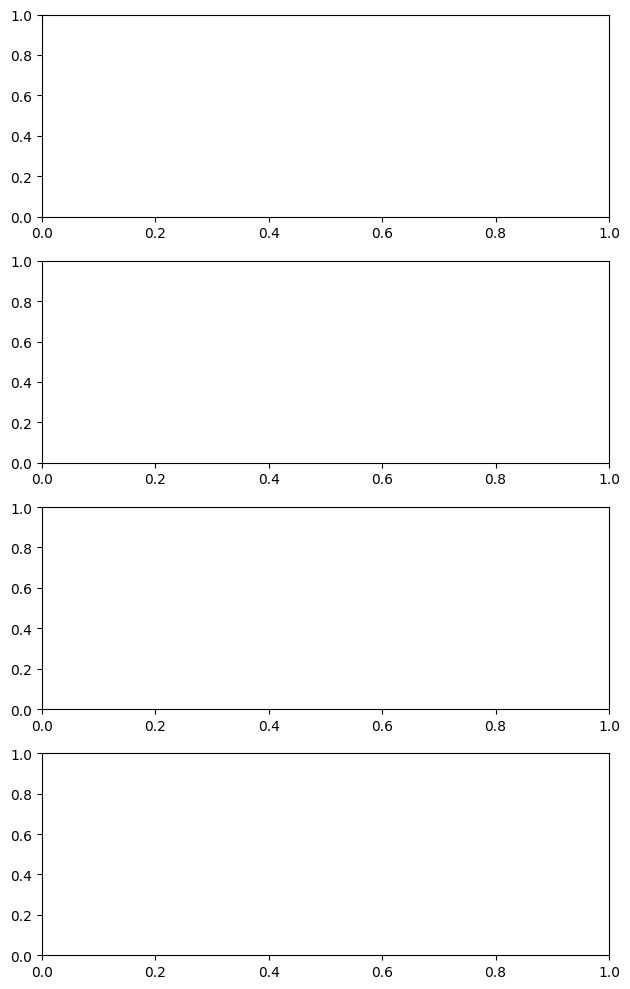

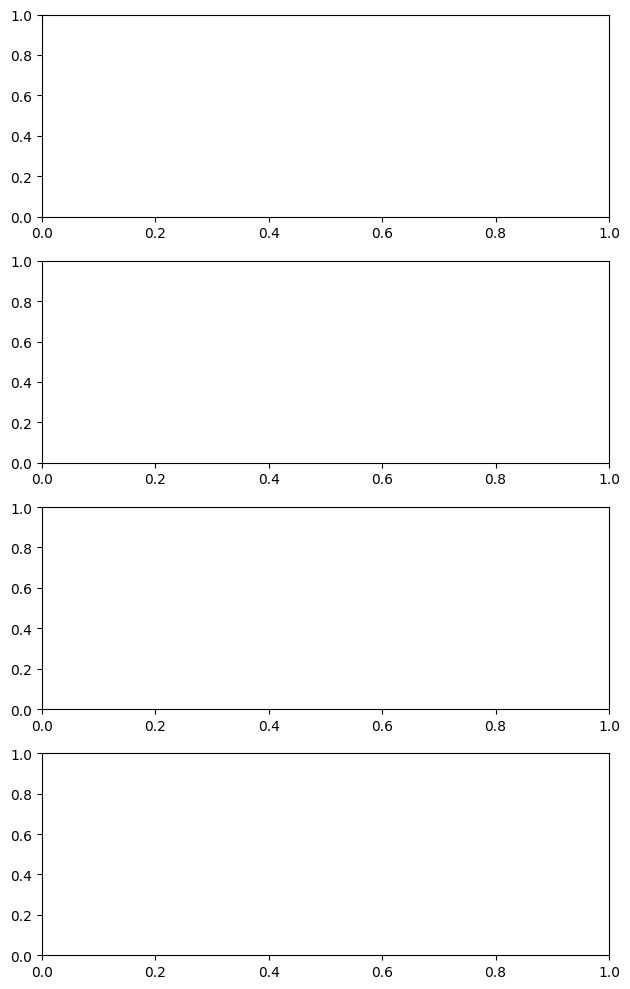

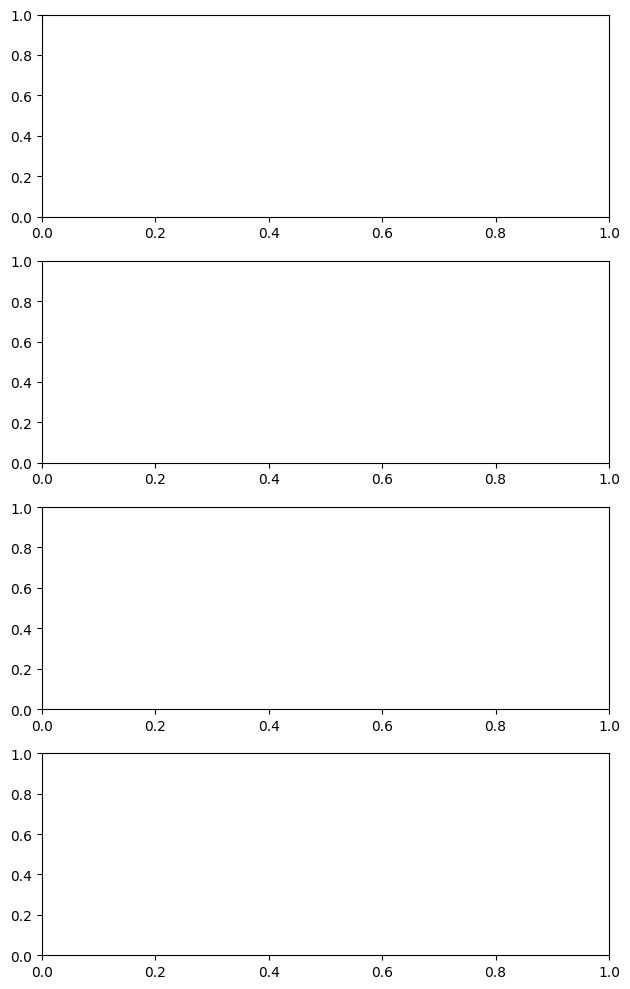

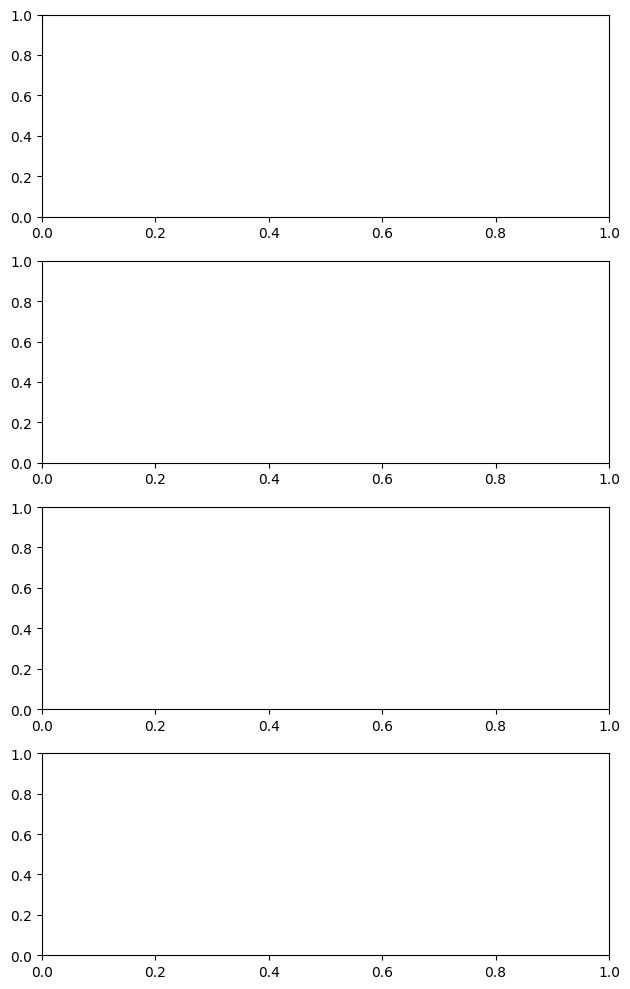

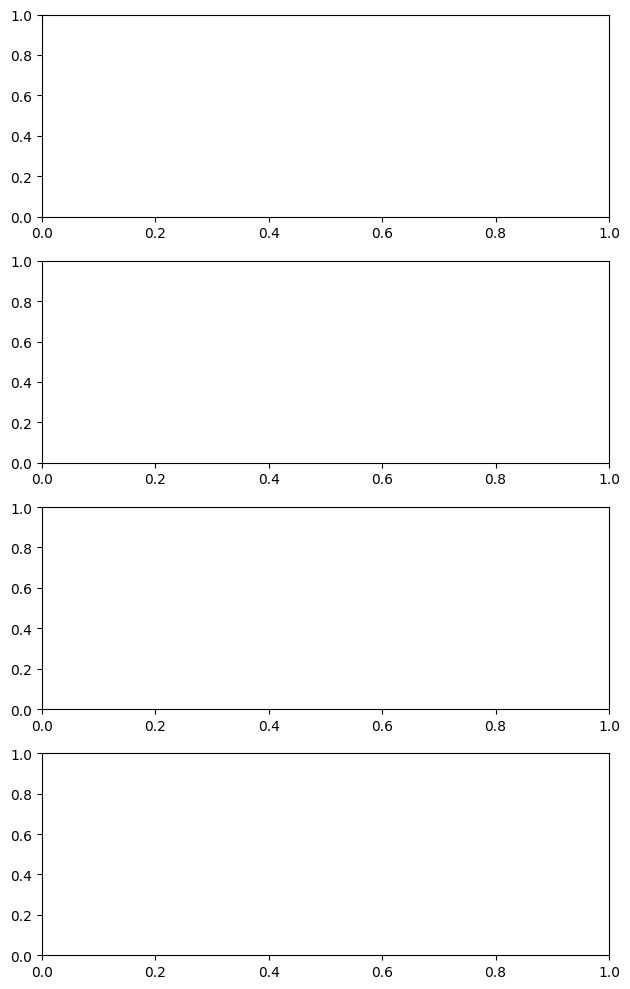

In [11]:
for col in COLUMNS:
    all_edge = [run[0][col] for run in data]
    all_stationary = [run[1][col] for run in data]
    all_roomscale = [run[2][col] for run in data]
    all_normal = [run[3][col] for run in data]

    all_edge_concat = pd.concat(all_edge)
    all_stationary_concat = pd.concat(all_stationary)
    all_roomscale_concat = pd.concat(all_roomscale)
    all_normal_concat = pd.concat(all_normal)
    
    try:
        fig, axes = plt.subplots(nrows=len(runs)+1)
        fig.set_figheight(10)
        fig.tight_layout()

        axes[0].boxplot(x=[all_edge_concat, all_stationary_concat, all_roomscale_concat, all_normal_concat], 
                        vert=False, 
                        labels=["Stationary Boundary Edge", "Stationary Boundary", "Roomscale Boundary", "No Boundary"])
        axes[0].title.set_text(f"{col} (All runs)")
        
        for run in range(len(runs)):
            axes[run+1].boxplot(x=[all_edge[run], all_stationary[run], all_roomscale[run], all_normal[run]], 
                            vert=False, 
                            labels=["Stationary Boundary Edge", "Stationary Boundary", "Roomscale Boundary", "No Boundary"])
            axes[run+1].title.set_text(f"{col} (Run {run})")
            
        plt.show()
    except:
        print(f"Cannot plot {col}")
        del fig
        continue
        
# for [edge, stationary, roomscale, normal] in data:
#     for col in edge.columns:
#         # plt.plot(boundary[col], label="Stationary Boundary Edge")
#         # plt.plot(normal[col], label="No Boundary")
#         # plt.plot(stationary[col], label="Stationary Boundary")
#         # plt.plot(roomscale[col], label="Roomscale Boundary")
#         data = [edge[col], stationary[col], roomscale[col], normal[col]]
#         try:
#             plt.boxplot(data, vert=False, labels=["Stationary Boundary Edge", "Stationary Boundary", "Roomscale Boundary", "No Boundary"])
#         except:
#             print(f"Can't plot {col}")
#             continue
#         plt.title(f"{col} (run {run})")
#         plt.show()